 # Project 2 - Programming for Data Analysis
 
 ---
 An analysis of paleo-present climate data


**Problem statement:**

An analysis of paleo-present climate data

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

• Examine Irish context: Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

• Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

• For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

• Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue • Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

Use a Jupyter notebook for your analysis and track your progress using GitHub. Use an academic referencing style

In [388]:
#imports

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

from sklearn.linear_model import LinearRegression

import seaborn as sns

from pandas.plotting import lag_plot


## 1. Data loading

### 1.1. Data for CO2 analysis


The first dataset is from research:  Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. [[1](https://www.nature.com/articles/nature06949)]

The dataset used in this research focuses on analyzing past atmospheric carbon dioxide concentrations by examining air trapped in ice cores from Antarctica. Specifically, the study utilizes ice cores from the Antarctic Vostok and EPICA Dome C locations to construct a composite record spanning the past 650,000 years. The research extends this record further by presenting results from the lowest 200 meters of the Dome C ice core, providing a comprehensive view of atmospheric carbon dioxide concentrations over 800,000 years before the present.
Before present (BP) Present-1950

In [240]:
df_composite_co2 = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2',  skiprows=2, header=4)

In [241]:
df_composite_co2.head(15)


,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
5,485,277.7
6,559,281.1
7,672,282.2
8,754,280.1
9,877,278.4


`EDC3_gas_a(yr)`  - years before present. Present is 1950. 

So if EDC3_gas_a(yr)=137, so year will be 1950-137=1813 A.D.

More discussion on this topic can be found: [[4](https://www.sedgeochem.uni-bremen.de/kiloyears.html)]

`CO2 (ppmv)`- CO2 concentration measured (parts per million by volume)

In [411]:
df_composite_co2['Year']=1950 - df_composite_co2['EDC3_gas_a (yr)']

In [243]:
df_composite_co2.columns

Index(['EDC3_gas_a (yr)', 'CO2 (ppmv)', 'Year'], dtype='object')

In [244]:
df_composite_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1096 non-null   int64  
 1   CO2 (ppmv)       1096 non-null   float64
 2   Year             1096 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 25.8 KB


In [246]:

df_composite_co2 = df_composite_co2.astype({'EDC3_gas_a (yr)': 'int', 'CO2 (ppmv)':'float64',  'Year':'int'})

The second dataset for CO2 data will be from IPCC Report [[2](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter01_SM.pdf)]

It is changed Lüthi et al. (2008) and  added on top Bereiter et al. (2015) data


Composite of atmospheric CO2 records from Antarctic ice cores

This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.
For details about the improvements relative to the previous version see supplementary information of the main article.
For detailed references of all records collected in this file also refer to the supplemetary information of the main article.
For latest anthropogenic data refer to NOAA/Mauna Loa record.
Age unit is in years before present (yr BP) whereas present refers to 1950.

Note, not all records shown in sheet "all records" are part of the composite. 
If millennial scale or smaller details of the composite are studied, we recommend to look into all records available for that period and not only in the composite. [2]


In [410]:
ipcc_co2_composite = pd.read_excel('datasets/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite',skiprows=7, header=7)
ipcc_co2_composite

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [248]:
ipcc_co2_composite.columns = ['gasage_yr_bp', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)']

In [249]:
ipcc_co2_composite.drop(['sigma mean CO2 (ppmv)'], axis=1)

,gasage_yr_bp,CO2 (ppmv)
0,-51.030000,368.022488
1,-48.000000,361.780737
2,-46.279272,359.647793
3,-44.405642,357.106740
4,-43.080000,353.946685
...,...,...
1896,803925.284376,202.921723
1897,804009.870607,207.498645
1898,804522.674630,204.861938
1899,805132.442334,202.226839


In [250]:
ipcc_co2_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gasage_yr_bp           1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


Here again Gassage (yr BP) is year presented as before present where present is 1950

In [251]:
ipcc_co2_composite['Year'] = 1950 - ipcc_co2_composite['gasage_yr_bp']


In [252]:
ipcc_co2_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gasage_yr_bp           1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
 3   Year                   1901 non-null   float64
dtypes: float64(4)
memory usage: 59.5 KB


In [253]:
ipcc_co2_composite.columns

Index(['gasage_yr_bp', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)', 'Year'], dtype='object')

In [254]:
ipcc_co2_composite = ipcc_co2_composite.astype({'gasage_yr_bp': 'float64', 'CO2 (ppmv)':'float64',  'Year':'int'})

IPCC data has more recent measurments up to 2001 when df_composite_co2 by Luthi only to 1813

In [255]:
#merging two datasets
co2_df_merged = ipcc_co2_composite.merge(df_composite_co2, on = 'Year', how = 'outer') 

In [256]:
#sort in the asc order
co2_df_merged = co2_df_merged.sort_values(by='Year', ascending=False)

co2_df_merged

,gasage_yr_bp,CO2 (ppmv)_x,sigma mean CO2 (ppmv),Year,EDC3_gas_a (yr),CO2 (ppmv)_y
0,-51.030000,368.022488,0.060442,2001,NaN,NaN
1,-48.000000,361.780737,0.370000,1998,NaN,NaN
2,-46.279272,359.647793,0.098000,1996,NaN,NaN
3,-44.405642,357.106740,0.159923,1994,NaN,NaN
4,-43.080000,353.946685,0.043007,1993,NaN,NaN
...,...,...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975,NaN,NaN
1897,804009.870607,207.498645,0.915083,-802059,NaN,NaN
1898,804522.674630,204.861938,1.642851,-802572,NaN,NaN
1899,805132.442334,202.226839,0.689587,-803182,NaN,NaN


In [257]:
#filling nan 
co2_df_merged['merged_CO2'] = co2_df_merged['CO2 (ppmv)_x'].fillna(co2_df_merged['CO2 (ppmv)_y'])
co2_df_merged

,gasage_yr_bp,CO2 (ppmv)_x,sigma mean CO2 (ppmv),Year,EDC3_gas_a (yr),CO2 (ppmv)_y,merged_CO2
0,-51.030000,368.022488,0.060442,2001,NaN,NaN,368.022488
1,-48.000000,361.780737,0.370000,1998,NaN,NaN,361.780737
2,-46.279272,359.647793,0.098000,1996,NaN,NaN,359.647793
3,-44.405642,357.106740,0.159923,1994,NaN,NaN,357.106740
4,-43.080000,353.946685,0.043007,1993,NaN,NaN,353.946685
...,...,...,...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975,NaN,NaN,202.921723
1897,804009.870607,207.498645,0.915083,-802059,NaN,NaN,207.498645
1898,804522.674630,204.861938,1.642851,-802572,NaN,NaN,204.861938
1899,805132.442334,202.226839,0.689587,-803182,NaN,NaN,202.226839


In [258]:
co2_merged = co2_df_merged[['Year', 'merged_CO2']].copy()
co2_merged

,Year,merged_CO2
0,2001,368.022488
1,1998,361.780737
2,1996,359.647793
3,1994,357.106740
4,1993,353.946685
...,...,...
1896,-801975,202.921723
1897,-802059,207.498645
1898,-802572,204.861938
1899,-803182,202.226839


For CO2, Mauna Loa observatory NOAA Data. It consists in yearly average measures of atmospheric CO2, obtained at Mauna Loa observatory. CO2 expressed as a mole fraction in dry air, micromol/mol, abbreviated as ppm
 Data source: [[3](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt)]

In [259]:
co2_annmean_mlo=pd.read_csv('datasets\co2_annmean_mlo.csv',skiprows=range(43),delimiter=",")
co2_annmean_mlo=co2_annmean_mlo.drop(columns='unc', axis=1)
co2_annmean_mlo=co2_annmean_mlo.rename(columns={'year': 'Year', 'mean':'CO2'})

In [260]:

co2_annmean_mlo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    65 non-null     int64  
 1   CO2     65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [261]:
co2_annmean_mlo

,Year,CO2
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
60,2019,411.65
61,2020,414.21
62,2021,416.41
63,2022,418.53


In [262]:
#merge all three co2 datasets
co2_df_merged_2023 = co2_merged.merge(co2_annmean_mlo, on = 'Year', how = 'outer') 

co2_df_merged_2023 = co2_df_merged_2023.sort_values(by='Year', ascending=False)

co2_df_merged_2023

,Year,merged_CO2,CO2
3028,2023,NaN,421.08
3027,2022,NaN,418.53
3026,2021,NaN,416.41
3025,2020,NaN,414.21
3024,2019,NaN,411.65
...,...,...,...
2988,-801975,202.921723,NaN
2989,-802059,207.498645,NaN
2990,-802572,204.861938,NaN
2991,-803182,202.226839,NaN


In [263]:
#fill nan and drop index
co2_df_merged_2023['merged_co2_new'] = co2_df_merged_2023['merged_CO2'].fillna(co2_df_merged_2023['CO2'])
co2_df_merged_2023=co2_df_merged_2023.reset_index(drop=True)

In [264]:
co2_df_merged_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            3029 non-null   int64  
 1   merged_CO2      2993 non-null   float64
 2   CO2             84 non-null     float64
 3   merged_co2_new  3029 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 94.8 KB


In [265]:
co2_df_merged_2023=co2_df_merged_2023[['Year', 'merged_co2_new']].copy()

In [266]:
co2_df_merged_2023

,Year,merged_co2_new
0,2023,421.080000
1,2022,418.530000
2,2021,416.410000
3,2020,414.210000
4,2019,411.650000
...,...,...
3024,-801975,202.921723
3025,-802059,207.498645
3026,-802572,204.861938
3027,-803182,202.226839


_______



### 1.2. Data for temperature analysis

**Temperature anomaly:**

In climate change studies, temperature anomalies are more important than absolute temperature. A temperature anomaly is the difference from an average, or baseline, temperature. The baseline temperature is typically computed by averaging 30 or more years of temperature data. A positive anomaly indicates the observed temperature was warmer than the baseline, while a negative anomaly indicates the observed temperature was cooler than the baseline. [[5](https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature)]

EPICA DATASET

A high-resolution deuterium profile is now available along the entire European Project for Ice Coring in Antarctica Dome C ice core, extending this climate record back to marine isotope stage 20.2, ~800,000 years ago. Experiments performed with an atmospheric general circulation model including water isotopes support its temperature interpretation. We assessed the general correspondence between Dansgaard-Oeschger events and their smoothed Antarctic counterparts for this Dome C record, which reveals the presence of such features with similar amplitudes during previous glacial periods. We suggest that the interplay between obliquity and precession accounts for the variable intensity of interglacial periods in ice core records.[[6](https://www.ncei.noaa.gov/access/paleo-search/study/6080)]

Link to dataset [[7](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt)]

In [267]:
epicaDC_temp_anom=pd.read_csv('datasets\edc3deuttemp2007.csv',skiprows=range(91),delimiter=r"\s+")


**Column information**

Column 1: Bag number (55 cm sample)

Column 2: Top depth (m)

Column 3: EDC3 age scale (years before year 1950)

Column 4:  Deuterium dD data (per mille with respect to SMOW)

Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)


In [268]:
epicaDC_temp_anom.head(15)

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
5,6,2.75,-17.73776,NaN,NaN
6,7,3.30,-10.95945,NaN,NaN
7,8,3.85,-3.20879,NaN,NaN
8,9,4.40,5.48176,NaN,NaN
9,10,4.95,13.52038,NaN,NaN


In [269]:
epicaDC_temp_anom['Year']=1950 - (epicaDC_temp_anom['Age'].astype(int))


In [270]:
epicaDC_temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bag          5800 non-null   int64  
 1   ztop         5800 non-null   float64
 2   Age          5800 non-null   float64
 3   Deuterium    5788 non-null   float64
 4   Temperature  5785 non-null   float64
 5   Year         5800 non-null   int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 249.3 KB


In [271]:
epicaDC_temp_anom

,Bag,ztop,Age,Deuterium,Temperature,Year
0,1,0.00,-50.00000,NaN,NaN,2000
1,2,0.55,-43.54769,NaN,NaN,1993
2,3,1.10,-37.41829,NaN,NaN,1987
3,4,1.65,-31.61153,NaN,NaN,1981
4,5,2.20,-24.51395,NaN,NaN,1974
...,...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73,-795458
5796,5797,3187.80,798443.00000,-439.00,-8.54,-796493
5797,5798,3188.35,799501.00000,-441.10,-8.88,-797551
5798,5799,3188.90,800589.00000,-441.42,-8.92,-798639


In [272]:
epicaDC_temp_anom.describe()

,Bag,ztop,Age,Deuterium,Temperature,Year
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000,5800.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228,-188065.971207
std,1674.460112,920.953062,192546.207239,20.359332,3.446971,192546.358262
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000,-799712.000000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000,-270506.250000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000,-119843.000000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000,-44380.000000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000,2000.000000


In [273]:
epica_temp_anom = epicaDC_temp_anom[['Year', 'Temperature']].copy()
epica_temp_anom

,Year,Temperature
0,2000,NaN
1,1993,NaN
2,1987,NaN
3,1981,NaN
4,1974,NaN
...,...,...
5795,-795458,-8.73
5796,-796493,-8.54
5797,-797551,-8.88
5798,-798639,-8.92


This dataset covers up to 2000


**Nasa temperature dataset**

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, L-OTI)
The following are plain-text files in tabular format of temperature anomalies, i.e. deviations from the corresponding 1951-1980 means.

Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month
Link to data source [[8](https://data.giss.nasa.gov/gistemp/)]





In [274]:
nasa_month_anom_temp = pd.read_csv('datasets/GLB.Ts+dSST.csv', header=1)
nasa_month_anom_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-.10,-.17,0.05,-0.08,-0.19
2,1882,0.16,0.14,0.05,-0.17,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-.09,.08,-0.09,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-.19,-.34,-0.16,-0.09,-0.18
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-0.33,-0.30,-0.28,-.27,-.10,-0.37,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.01,0.85,0.90,0.94,0.95,0.92,1.00,0.99,1.09,0.98,.96,.93,1.01,0.93,0.97
140,2020,1.17,1.24,1.17,1.13,1.01,0.92,0.90,0.87,0.98,0.88,1.10,0.80,1.01,1.04,1.17,1.10,0.89,0.99
141,2021,0.81,0.64,0.89,0.75,0.78,0.84,0.92,0.82,0.92,1.00,0.94,0.86,0.85,.84,.75,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,0.89,0.96,0.72,0.80,0.89,.90,.89,0.91,0.94,0.86


In [275]:
nasa_month_anom_temp.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [276]:
nasa_anom_temp = nasa_month_anom_temp[['Year', 'J-D']].copy()
nasa_anom_temp

,Year,J-D
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
...,...,...
139,2019,0.98
140,2020,1.01
141,2021,0.85
142,2022,0.89


In [277]:
nasa_anom_temp.rename(columns={'J-D': 'Temperature'}, inplace=True)
nasa_anom_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         144 non-null    int64  
 1   Temperature  144 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [278]:
nasa_anom_temp.describe()

,Year,Temperature
count,144.000000,144.000000
mean,1951.500000,0.067708
std,41.713307,0.378635
min,1880.000000,-0.480000
25%,1915.750000,-0.200000
50%,1951.500000,-0.045000
75%,1987.250000,0.280000
max,2023.000000,1.170000


In [279]:
#merge two temperature anomalies datasets
temp_anom_merged = nasa_anom_temp.merge(epica_temp_anom, on = 'Year', how = 'outer') 
temp_anom_merged

,Year,Temperature_x,Temperature_y
0,1880,-0.17,NaN
1,1881,-0.09,NaN
2,1882,-0.11,NaN
3,1883,-0.17,NaN
4,1884,-0.28,NaN
...,...,...,...
5923,-795458,NaN,-8.73
5924,-796493,NaN,-8.54
5925,-797551,NaN,-8.88
5926,-798639,NaN,-8.92


In [280]:
temp_anom_merged['merged_temp'] = temp_anom_merged['Temperature_x'].fillna(temp_anom_merged['Temperature_y'])
temp_anom_merged

,Year,Temperature_x,Temperature_y,merged_temp
0,1880,-0.17,NaN,-0.17
1,1881,-0.09,NaN,-0.09
2,1882,-0.11,NaN,-0.11
3,1883,-0.17,NaN,-0.17
4,1884,-0.28,NaN,-0.28
...,...,...,...,...
5923,-795458,NaN,-8.73,-8.73
5924,-796493,NaN,-8.54,-8.54
5925,-797551,NaN,-8.88,-8.88
5926,-798639,NaN,-8.92,-8.92


In [281]:
temp_anom_merged = temp_anom_merged.sort_values(by='Year', ascending=False)

temp_anom_merged=temp_anom_merged.reset_index(drop=True)
temp_anom_merged

,Year,Temperature_x,Temperature_y,merged_temp
0,2023,1.17,NaN,1.17
1,2022,0.89,NaN,0.89
2,2021,0.85,NaN,0.85
3,2020,1.01,NaN,1.01
4,2019,0.98,NaN,0.98
...,...,...,...,...
5923,-795458,NaN,-8.73,-8.73
5924,-796493,NaN,-8.54,-8.54
5925,-797551,NaN,-8.88,-8.88
5926,-798639,NaN,-8.92,-8.92



*I do not used this one dataset because Global column had way to big diff from nasa temp data

Twelve-month average surface air temperature anomalies
Data source: ERA5
Reference period: 1991-2020
Col. 1: last month of the time period as YYYYMM
Col. 2,3: weighted averages for the following regions and surfaces (ocean, land)
Global: all surfaces (180W, 180E, 90S, 90N)
European: land only (25W-40E, 34N-72N)
https://sites.ecmwf.int/data/c3sci/bulletin/202310/temperature/1991-2020/

In [282]:
era5_temp_anom=pd.read_csv('datasets/ts_12month_anomaly_Global_ERA5_2t_202310_1991-2020_v01.1.csv',skiprows=range(8),delimiter=",")
era5_temp_anom=era5_temp_anom.drop(columns='European', axis=1)
era5_temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   527 non-null    int64  
 1   Global  527 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.4 KB


In [283]:
era5_temp_anom['Year'] = pd.to_datetime(era5_temp_anom['Month'], format='%Y%m').dt.year
era5_temp_anom[['Year', 'Global']]

,Year,Global
0,1979,-0.4270
1,1980,-0.4166
2,1980,-0.3825
3,1980,-0.3647
4,1980,-0.3381
...,...,...
522,2023,0.3473
523,2023,0.3768
524,2023,0.4119
525,2023,0.4597


In [284]:
era5_temp_anom = era5_temp_anom.drop(columns='Month', axis=1)

In [285]:
era5_temp_anom_group = era5_temp_anom.groupby('Year').mean()
era5_temp_anom_group.reset_index(inplace=True)

era5_temp_anom_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    45 non-null     int32  
 1   Global  45 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 672.0 bytes


In [286]:
temp_anom_merged_2023 = era5_temp_anom_group.merge(temp_anom_merged, on = 'Year', how = 'outer') 
temp_anom_merged_2023

,Year,Global,Temperature_x,Temperature_y,merged_temp
0,1979,-0.427000,0.16,NaN,0.16
1,1980,-0.310092,0.26,NaN,0.26
2,1981,-0.285208,0.32,NaN,0.32
3,1982,-0.403642,0.14,NaN,0.14
4,1983,-0.320208,0.31,NaN,0.31
...,...,...,...,...,...
5923,-795458,NaN,NaN,-8.73,-8.73
5924,-796493,NaN,NaN,-8.54,-8.54
5925,-797551,NaN,NaN,-8.88,-8.88
5926,-798639,NaN,NaN,-8.92,-8.92


In [287]:
temp_anom_merged_2023['merged_temp_new'] = temp_anom_merged_2023['merged_temp'].fillna(temp_anom_merged_2023['Global'])
temp_anom_merged_2023

,Year,Global,Temperature_x,Temperature_y,merged_temp,merged_temp_new
0,1979,-0.427000,0.16,NaN,0.16,0.16
1,1980,-0.310092,0.26,NaN,0.26,0.26
2,1981,-0.285208,0.32,NaN,0.32,0.32
3,1982,-0.403642,0.14,NaN,0.14,0.14
4,1983,-0.320208,0.31,NaN,0.31,0.31
...,...,...,...,...,...,...
5923,-795458,NaN,NaN,-8.73,-8.73,-8.73
5924,-796493,NaN,NaN,-8.54,-8.54,-8.54
5925,-797551,NaN,NaN,-8.88,-8.88,-8.88
5926,-798639,NaN,NaN,-8.92,-8.92,-8.92


In [288]:
temp_anom_merged_2023 = temp_anom_merged_2023.sort_values(by='Year', ascending=False)

temp_anom_merged_2023=temp_anom_merged_2023.reset_index(drop=True)
temp_anom_merged_2023.tail()

,Year,Global,Temperature_x,Temperature_y,merged_temp,merged_temp_new
5923,-795458,NaN,NaN,-8.73,-8.73,-8.73
5924,-796493,NaN,NaN,-8.54,-8.54,-8.54
5925,-797551,NaN,NaN,-8.88,-8.88,-8.88
5926,-798639,NaN,NaN,-8.92,-8.92,-8.92
5927,-799712,NaN,NaN,-8.82,-8.82,-8.82


### 1.3. Data for CH4 analysis

Source for dataset was found during reading this [[9](https://www.methanelevels.org/)]


NAME OF DATA SET: EPICA Dome C Ice Core 800KYr Methane Data [[10](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-6093
)]


DESCRIPTION:   
Methane record from the EPICA (European Project for Ice Coring in Antarctica) 
Dome C ice core covering 0 to 800 kyr BP.  The air from polar ice-core samples 
of about 40g (Bern) and 50g (LGGE) is extracted with a melt-refreezing method 
under vacuum, and the extracted gas is then analysed for CH4 by gas chromatography. 
Two standard gases (408 p.p.b.v. CH4, 1,050 p.p.b.v. CH4) were used at Bern 
and one (499 p.p.b.v. CH4) at LGGE, to calibrate the gas chromatographs. 
The mean CH4 analytical uncertainty (1s) is 10 p.p.b.v.

In [412]:
methan_epica=pd.read_csv('datasets/ch4_800kyr.csv',delimiter=r"\s+",  header=1)


Column 1: EDC1999 depth (m)
Column 2: Gas Age (EDC3 gas age, years before 1950 AD)
Column 3: CH4 mean (ppbv)
Column 4: 1-sigma uncertainty (ppbv)
Column 5: Laboratory (b=Bern, g=Grenoble)

In [290]:
methan_epica

,Depth,Gas_Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [413]:

methan_epica['Year']=1950 - (methan_epica['Gas_Age'].astype(int))
methan_epica

,Depth,Gas_Age,CH4_mean,1s,Lab.,Year
0,99.34,13,907,10.0,b,1937
1,102.45,126,784,10.0,g,1824
2,102.58,130,762,10.0,b,1820
3,103.34,151,710,10.0,g,1799
4,104.33,184,727,10.0,g,1766
...,...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g,-792988
2099,3188.95,796320,418,10.0,b,-794370
2100,3189.43,797277,396,10.0,g,-795327
2101,3190.03,798417,458,10.0,g,-796467


NAME OF DATA SET:  

**Law Dome Ice Core 2000-Year CO2, CH4, and N2O Data** 

The time period coverage is from 1949 to -56 in calendar years before present (BP). See metadata information for parameter and study location details.[[11](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-9959)]

In [293]:
methan_law = pd.read_excel('datasets/law2006.xls', sheet_name='CH4 by age')

In [294]:
methan_law=methan_law.drop(['Sample Type', 'Unnamed: 4', 'publication status'], axis=1)

In [295]:
methan_law.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CH4 gas age years AD      331 non-null    float64
 1   CH4 (ppb)                 331 non-null    float64
 2   CH4 (ppb) - NOAA04 Scale  331 non-null    float64
dtypes: float64(3)
memory usage: 7.9 KB


In [296]:
methan_law.columns = ['Year', 'CO4(ppb)', 'CO4(ppb)noaa04']

In [297]:
methan_law

,Year,CO4(ppb),CO4(ppb)noaa04
0,2004.461749,1708.842301,1729.690177
1,2004.054645,1707.299996,1728.129056
2,2003.386301,1709.650905,1730.508646
3,2003.200000,1707.224783,1728.052926
4,2003.161644,1706.182243,1726.997666
...,...,...,...
326,136.983072,638.815040,646.608583
327,105.481929,632.028000,639.738742
328,56.959144,628.443720,636.110733
329,30.524058,633.875360,641.608639


In [298]:
methan_law = methan_law.astype({'Year': 'int'})

In [299]:
methan_law

,Year,CO4(ppb),CO4(ppb)noaa04
0,2004,1708.842301,1729.690177
1,2004,1707.299996,1728.129056
2,2003,1709.650905,1730.508646
3,2003,1707.224783,1728.052926
4,2003,1706.182243,1726.997666
...,...,...,...
326,136,638.815040,646.608583
327,105,632.028000,639.738742
328,56,628.443720,636.110733
329,30,633.875360,641.608639


In [300]:
methan_law.value_counts('Year')

Year
1997    15
1995    13
1990    12
1994     7
1993     6
        ..
1667     1
1682     1
1690     1
1695     1
1856     1
Name: count, Length: 198, dtype: int64

Group months and find mean 

In [301]:
methan_law_grouped = methan_law.groupby('Year').mean()
methan_law_grouped.reset_index(inplace=True)

methan_law_grouped

,Year,CO4(ppb),CO4(ppb)noaa04
0,14,647.640200,655.541410
1,30,633.875360,641.608639
2,56,628.443720,636.110733
3,105,632.028000,639.738742
4,136,638.815040,646.608583
...,...,...,...
193,2000,1707.355610,1728.185349
194,2001,1708.885638,1729.734043
195,2002,1709.131351,1729.982754
196,2003,1707.431474,1728.262138


In [302]:
methan_law_grouped.value_counts('Year')

Year
14      1
1912    1
1915    1
1917    1
1919    1
       ..
1682    1
1690    1
1695    1
1723    1
2004    1
Name: count, Length: 198, dtype: int64

In [303]:
methan_merged_inner = methan_epica.merge(methan_law_grouped, on = 'Year', how = 'inner') 
methan_merged_inner

,Depth,Gas_Age,CH4_mean,1s,Lab.,Year,CO4(ppb),CO4(ppb)noaa04
0,99.34,13,907,10.0,b,1937,1052.438817,1065.278571
1,104.78,207,683,10.0,b,1743,706.404320,715.022453
2,121.15,742,643,10.0,b,1208,677.890720,686.160987
3,130.79,1092,633,10.0,g,858,657.288640,665.307561
4,145.80,1620,610,10.0,g,330,619.437840,626.994982


In [304]:
methan_merged = methan_law_grouped.merge(methan_epica, on = 'Year', how = 'outer') 
methan_merged

,Year,CO4(ppb),CO4(ppb)noaa04,Depth,Gas_Age,CH4_mean,1s,Lab.
0,14,647.64020,655.541410,NaN,NaN,NaN,NaN,NaN
1,30,633.87536,641.608639,NaN,NaN,NaN,NaN,NaN
2,56,628.44372,636.110733,NaN,NaN,NaN,NaN,NaN
3,105,632.02800,639.738742,NaN,NaN,NaN,NaN,NaN
4,136,638.81504,646.608583,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2291,-792988,NaN,NaN,3188.08,794938.0,428.0,10.0,g
2292,-794370,NaN,NaN,3188.95,796320.0,418.0,10.0,b
2293,-795327,NaN,NaN,3189.43,797277.0,396.0,10.0,g
2294,-796467,NaN,NaN,3190.03,798417.0,458.0,10.0,g


In [305]:
methan_merged['methan_merged'] = methan_merged['CO4(ppb)'].fillna(methan_merged['CH4_mean'])
methan_merged

,Year,CO4(ppb),CO4(ppb)noaa04,Depth,Gas_Age,CH4_mean,1s,Lab.,methan_merged
0,14,647.64020,655.541410,NaN,NaN,NaN,NaN,NaN,647.64020
1,30,633.87536,641.608639,NaN,NaN,NaN,NaN,NaN,633.87536
2,56,628.44372,636.110733,NaN,NaN,NaN,NaN,NaN,628.44372
3,105,632.02800,639.738742,NaN,NaN,NaN,NaN,NaN,632.02800
4,136,638.81504,646.608583,NaN,NaN,NaN,NaN,NaN,638.81504
...,...,...,...,...,...,...,...,...,...
2291,-792988,NaN,NaN,3188.08,794938.0,428.0,10.0,g,428.00000
2292,-794370,NaN,NaN,3188.95,796320.0,418.0,10.0,b,418.00000
2293,-795327,NaN,NaN,3189.43,797277.0,396.0,10.0,g,396.00000
2294,-796467,NaN,NaN,3190.03,798417.0,458.0,10.0,g,458.00000


In [306]:
methan_merged = methan_merged[['Year', 'methan_merged']].copy()


In [307]:
methan_merged = methan_merged.sort_values(by='Year', ascending=False)

methan_merged=methan_merged.reset_index(drop=True)


In [308]:
methan_merged

,Year,methan_merged
0,2004,1708.071148
1,2003,1707.431474
2,2002,1709.131351
3,2001,1708.885638
4,2000,1707.355610
...,...,...
2291,-792988,428.000000
2292,-794370,418.000000
2293,-795327,396.000000
2294,-796467,458.000000


### 1.4 Data for Irish context

In [309]:

# Read Irish meteorological data from the CSV file
df_irish_met_data = pd.read_csv('datasets/LongTermTemperatures_1900-2022_annual.csv')

In [310]:
df_irish_met_data.head()

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3



Source: Met Éireann
https://data.cso.ie/table/MTM02

In [311]:
cso_irish_temp = pd.read_csv('datasets/MTM02.20240118T180114.csv')


## 2. Analysis
TASK: 

For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

Examine one other (paleo/modern): CH4


NB! Merging datasets code can be found above in each 'download data for' sections.


### 2.1 Analyse CO2 vs Temperature Anomaly from 800kyrs – present

I downloaded two main datasets that cover 800kyr and one recent Mauna Loa

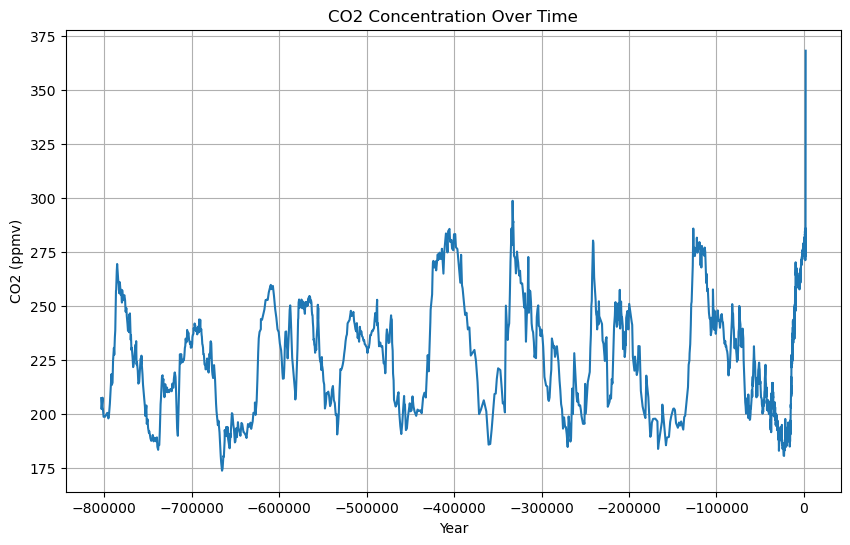

In [312]:
plt.figure(figsize=(10, 6))
plt.plot(ipcc_co2_composite['Year'], ipcc_co2_composite['CO2 (ppmv)'], linestyle='-')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.grid(True)
plt.show()

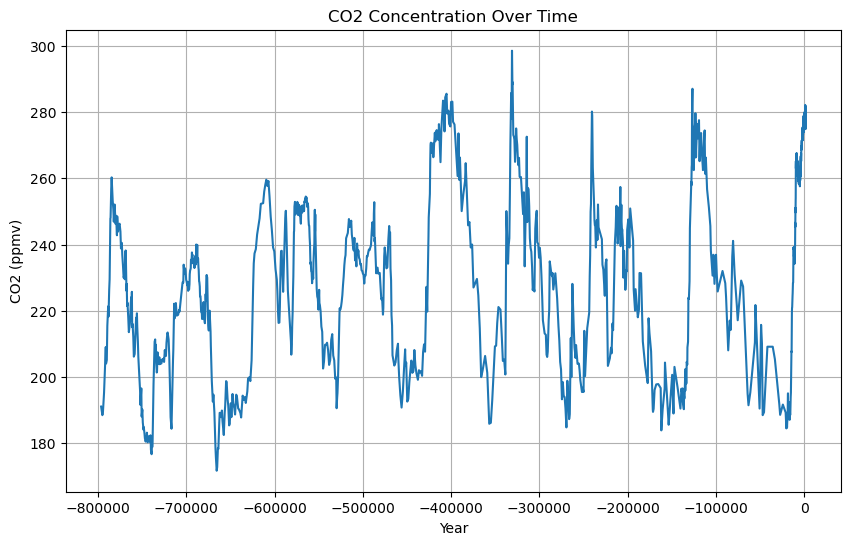

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(df_composite_co2['Year'], df_composite_co2['CO2 (ppmv)'], linestyle='-')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.grid(True)
plt.show()

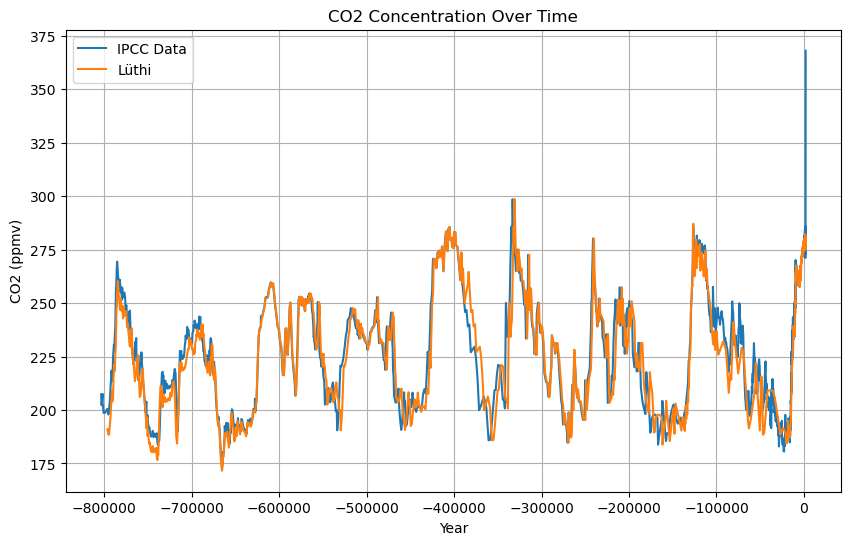

In [314]:
plt.figure(figsize=(10, 6))

# Plot the first dataframe
plt.plot(ipcc_co2_composite['Year'], ipcc_co2_composite['CO2 (ppmv)'], linestyle='-', label='IPCC Data')

# Plot the second dataframe
plt.plot(df_composite_co2['Year'], df_composite_co2['CO2 (ppmv)'], linestyle='-', label='Lüthi')

plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.grid(True)
plt.legend()  
plt.show()


On the plotted graph, the 'CO2 (ppmv)' values from 'ipcc_co2_composite' and 'df_composite_co2' appear very similar, suggesting that they can be merged to address missing values in each dataset.

Additionally, there is a third dataset representing recent CO2 measurements spanning from 1959 to 2023. This dataset differs from the ice core datasets used in Antarctica; instead, it originates from air samples collected near the Mauna Loa Observatory in Hawaii.

In [414]:
co2_merged.head(100)

,Year,merged_CO2
0,2001,368.022488
1,1998,361.780737
2,1996,359.647793
3,1994,357.106740
4,1993,353.946685
...,...,...
95,1930,305.740919
96,1929,305.380827
97,1928,305.782941
98,1928,305.705372


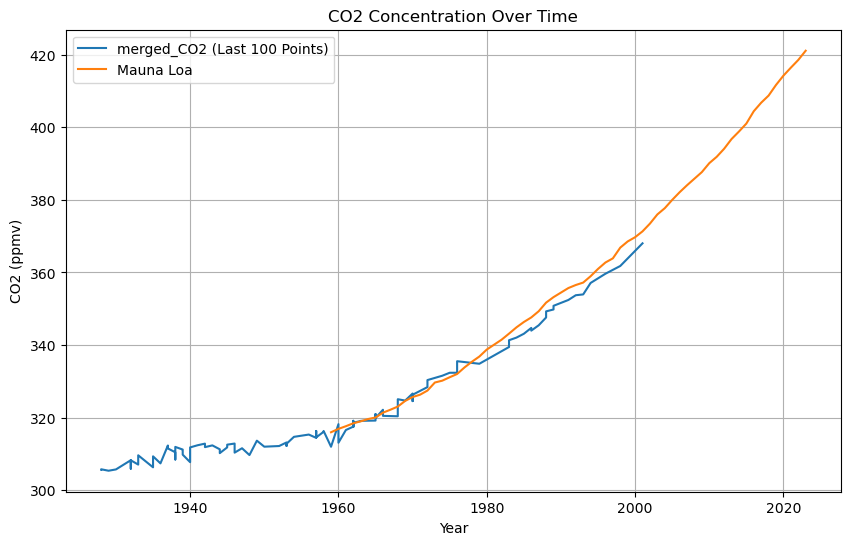

In [316]:
# Select the last 1000 data points from the first dataset
co2_merged_tail = co2_merged.head(100)

plt.figure(figsize=(10, 6))

# Plot co2_merged dataset with the last 100 data points
plt.plot(co2_merged_tail['Year'], co2_merged_tail['merged_CO2'], linestyle='-', label='merged_CO2 (Last 100 Points)')


# Plot the new dataset on top
plt.plot(co2_annmean_mlo['Year'], co2_annmean_mlo['CO2'], linestyle='-', label='Mauna Loa')

plt.title('CO2 Concentration 100 years')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.grid(True)
plt.legend()

plt.show()

Due to the close alignment of the blue and orange lines on the plot, it is reasonable to assume that the CO2 data obtained from ice cores (Luthi EPICA Dataset CO2 Composed and IPCC CO2 Composed) and from air near the Mauna Loa Observatory can be merged. This merging process results in a fused CO2 dataset named 'co2_df_merged_2023,' which encompasses data from three sources: Luthi EPICA Dataset CO2 Composed, IPCC CO2 Composed, and Mauna Loa NOAA. 

The fused dataset contains a total of 3029 rows, covering a time span from 800,000 years ago to the present year 2023.

In [317]:
co2_df_merged_2023.describe()

,Year,merged_co2_new
count,3029.000000,3029.000000
mean,-291690.900957,235.498726
std,279295.479505,36.531436
min,-803718.000000,171.600000
25%,-560740.000000,206.085788
50%,-212509.000000,232.701024
75%,-15213.000000,256.043061
max,2023.000000,421.080000


____
Temperature anomaly datasets exhibit a similar pattern of alignment like CO2, allowing for the assumption that they can be merged for a more comprehensive analysis.

The first dataset, 'epicaDC_temp_anom,' covers temperature anomalies up to the year 2000.

The second dataset, 'nasa_anom_temp,' is sourced from NASA and spans the period 1951-1980. It provides combined land-surface air and sea-surface water temperature anomalies, known as the Land-Ocean Temperature Index (L-OTI).

The third dataset, 'era5_temp_anom,' is derived from ERA5 and covers the reference period from 1991 to 2023.

The merging of these temperature anomaly datasets creates a unified dataset for further analysis, enhancing the coverage of temperature anomaly data over different time periods and sources.

In [318]:
nasa_anom_temp

,Year,Temperature
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
...,...,...
139,2019,0.98
140,2020,1.01
141,2021,0.85
142,2022,0.89


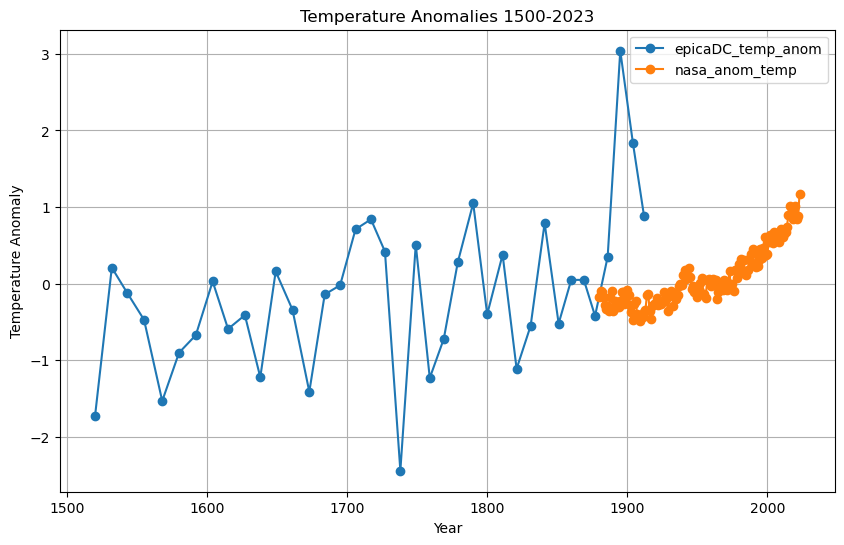

In [415]:
x1 = epicaDC_temp_anom['Year'].iloc[:50]
y1 = epicaDC_temp_anom['Temperature'].iloc[:50]

x2 = nasa_anom_temp['Year']
y2 = nasa_anom_temp['Temperature']

plt.figure(figsize=(10, 6))


plt.plot(x1, y1, label='epicaDC_temp_anom', linestyle='-', marker='o')
plt.plot(x2, y2, label='nasa_anom_temp', linestyle='-', marker='o')

plt.title('Temperature Anomalies 1500-2023')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()

plt.show()

In [320]:

temp_anom_merged

,Year,Temperature_x,Temperature_y,merged_temp
0,2023,1.17,NaN,1.17
1,2022,0.89,NaN,0.89
2,2021,0.85,NaN,0.85
3,2020,1.01,NaN,1.01
4,2019,0.98,NaN,0.98
...,...,...,...,...
5923,-795458,NaN,-8.73,-8.73
5924,-796493,NaN,-8.54,-8.54
5925,-797551,NaN,-8.88,-8.88
5926,-798639,NaN,-8.92,-8.92


In [321]:
nasa_anom_temp

,Year,Temperature
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
...,...,...
139,2019,0.98
140,2020,1.01
141,2021,0.85
142,2022,0.89


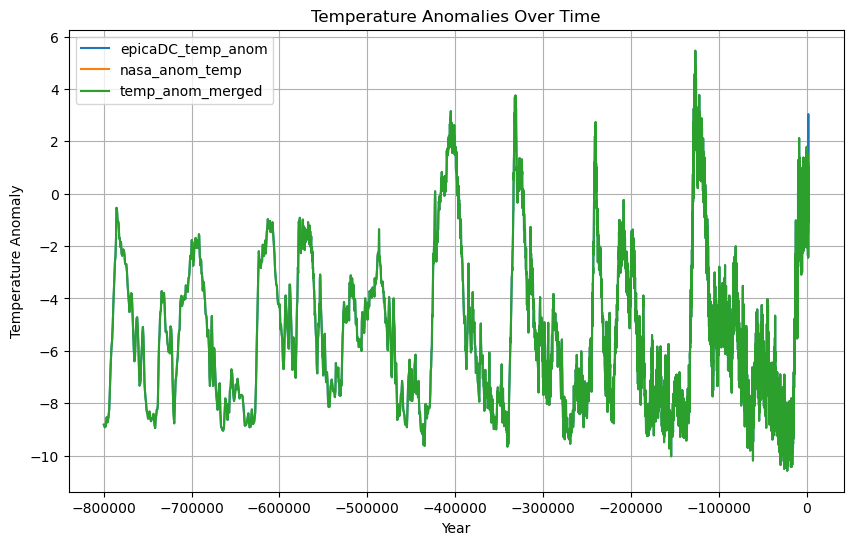

In [322]:
x1 = epicaDC_temp_anom['Year']
y1 = epicaDC_temp_anom['Temperature']

x2 = nasa_anom_temp['Year']
y2 = nasa_anom_temp['Temperature']

x3 = temp_anom_merged['Year']
y3 = temp_anom_merged['merged_temp']

plt.figure(figsize=(10, 6))

# Plot the temperature anomalies from the first dataset
plt.plot(x1, y1, label='epicaDC_temp_anom', linestyle='-')

# Plot the temperature anomalies from the second dataset
plt.plot(x2, y2, label='nasa_anom_temp', linestyle='-')

# Plot the temperature anomalies from the third dataset
plt.plot(x3, y3, label='temp_anom_merged', linestyle='-')

plt.title('Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()

plt.show()

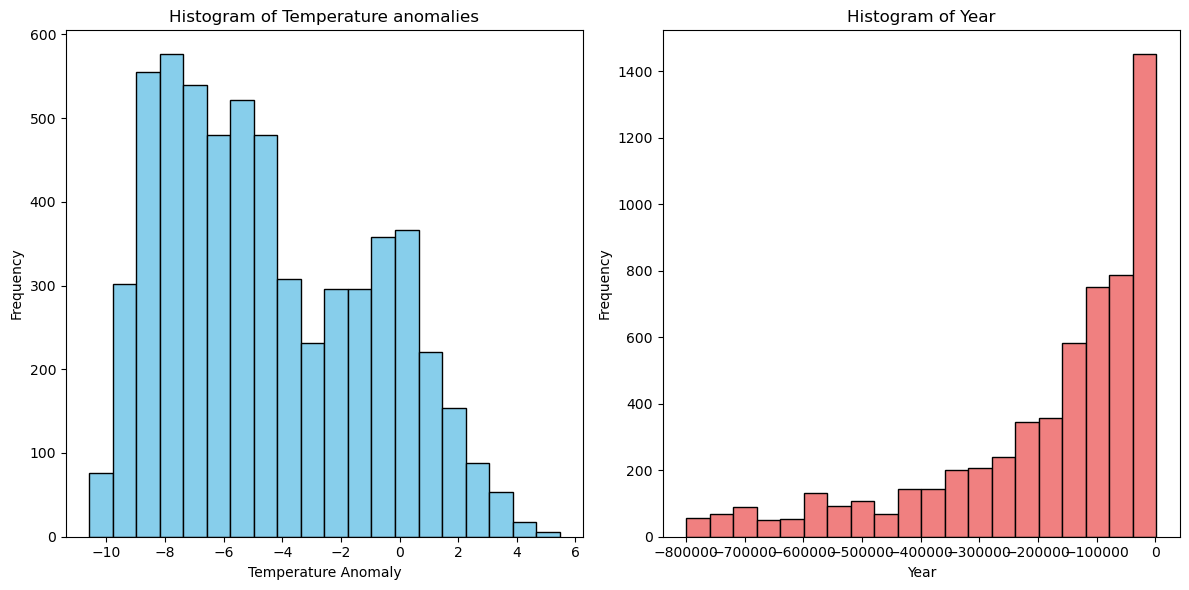

In [323]:
plt.figure(figsize=(12, 6))

# Create a subplot for 'merged_temp'
plt.subplot(1, 2, 1)
plt.hist(temp_anom_merged['merged_temp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature anomalies')
plt.xlabel('Temperature Anomaly')
plt.ylabel('Frequency')

# Create a subplot for 'Year'
plt.subplot(1, 2, 2)
plt.hist(temp_anom_merged['Year'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Conclusion




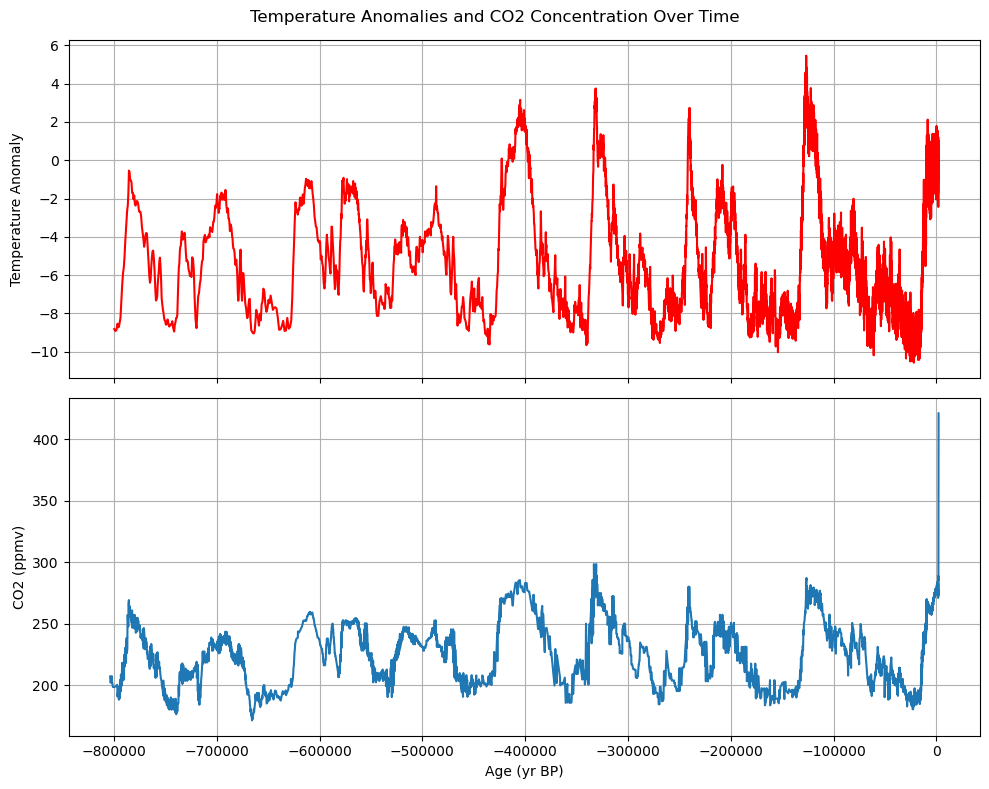

In [324]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the temperature anomaly data on the first subplot (top) in red
ax1.plot(temp_anom_merged['Year'], temp_anom_merged['merged_temp'], label='Temperature Anomalies', linestyle='-', color='red')
ax1.set_ylabel('Temperature Anomaly')
ax1.grid(True)

# Plot the CO2 concentration data on the second subplot (bottom)
ax2.plot(co2_df_merged_2023['Year'], co2_df_merged_2023['merged_co2_new'], label='CO2 Concentration', linestyle='-')
ax2.set_xlabel('Age (yr BP)')
ax2.set_ylabel('CO2 (ppmv)')
ax2.grid(True)

plt.suptitle('Temperature Anomalies and CO2 Concentration Over Time')
plt.tight_layout()
plt.show()

The close alignment of peaks and low points between the temperature anomalies and CO2 concentration datasets, as evident in the provided plot, suggests a potential correlation or synchronicity between these two variables over time.

I will compose them into one to show it closer.

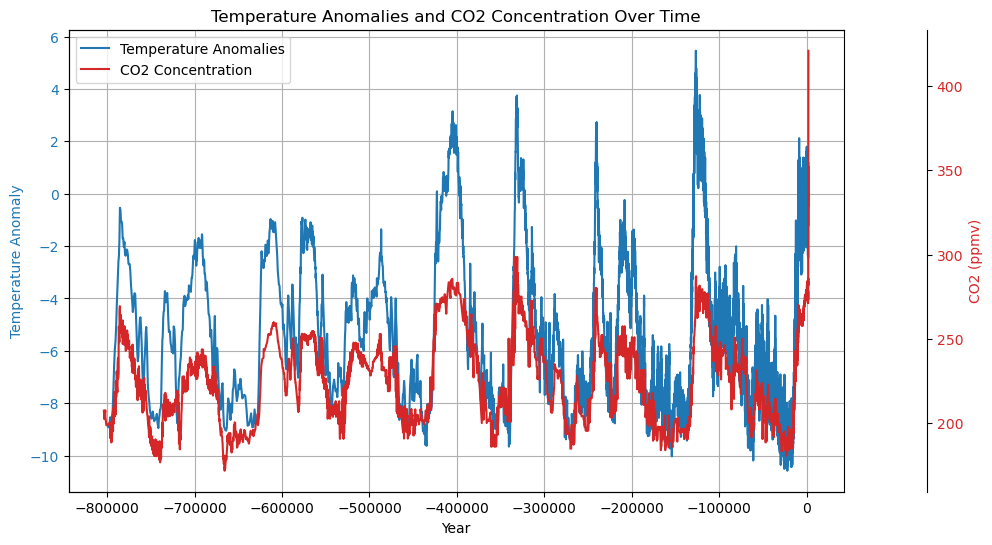

In [326]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(temp_anom_merged['Year'], temp_anom_merged['merged_temp'], label='Temperature Anomalies', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(co2_df_merged_2023['Year'], co2_df_merged_2023['merged_co2_new'], label='CO2 Concentration', linestyle='-', color='tab:red')
ax2.set_ylabel('CO2 (ppmv)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title
plt.title('Temperature Anomalies and CO2 Concentration Over Time')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

The patterns we see in the chart tell us about the climate in the distant past. When we look at how temperature anomalies (unusual temperature changes) and CO2 concentrations have moved together in the past, it helps us figure out the connections that affect Earth's climate over really long periods.

In simpler terms, the ups and downs we observe in both temperature and CO2 levels on the chart give us clues about how they're linked and how they've changed over a very, very long time. It's like putting puzzle pieces together to understand how Earth's climate has worked over a really, really long time

I tried to follow the tutorial on time series analysis[[13](https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true )] using Python and pandas. However, the packages used in the tutorial typically work with data in datatime format and datatime python has constraints,e.g. a minimum year of 1 and don't extend to the 800,000-year timeframe I was interested in. As a result, I encountered errors when applying the techniques to my dataset. Despite attempting to address these errors, I was only able to work with the available data for the most recent 100 data points or the last 2000 years.



After visual observation of plot I suppose that we have non-stationary series in both situation. I want to do some transformation to convert a non-stationary series to stationary so I can perform more analysis on it

In [327]:
#matplotlib do not read year datatime so this version with int will be used only for plots

temp_anom_plt = temp_anom_merged.iloc[:282]

In [328]:
temp_anom = temp_anom_merged.iloc[:282]
temp_anom =temp_anom[['Year', 'merged_temp']].copy()
temp_anom.rename(columns={'merged_temp': 'temp'}, inplace=True)
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    282 non-null    int64  
 1   temp    282 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.5 KB


In [ ]:
error that took me a lot of time to find solution. Below I am working toward solution. Jump to (#Analysis (present time))

In [329]:

temp_anom['Year'] = temp_anom['Year'].apply(lambda x: datetime.strptime(str(x), '%Y'))
temp_anom

ValueError: time data '989' does not match format '%Y'

column int Year do not convert into datatime year because it doesn't see year=12 as year

I want to add leading zeros to the 'Year' column to ensure it has a consistent format with at least 4 digits so I found  the `str.zfill` method in pandas

In [330]:
temp_anom['Year'] = temp_anom['Year'].astype(str).str.zfill(4)

In [331]:
temp_anom

,Year,temp
0,2023,1.17
1,2022,0.89
2,2021,0.85
3,2020,1.01
4,2019,0.98
...,...,...
277,0078,-1.06
278,0062,1.79
279,0045,0.00
280,0028,0.01


In [332]:
temp_anom.tail(66)

,Year,temp
216,1004,-0.55
217,0989,-0.75
218,0975,0.38
219,0960,-0.40
220,0946,-0.44
...,...,...
277,0078,-1.06
278,0062,1.79
279,0045,0.00
280,0028,0.01


In [333]:
temp_anom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    282 non-null    object 
 1   temp    282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [334]:
temp_anom_new = temp_anom_merged.iloc[:217]
temp_anom_new =temp_anom_new[['Year', 'merged_temp']].copy()
temp_anom_new.rename(columns={'merged_temp': 'temp'}, inplace=True)
temp_anom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    217 non-null    int64  
 1   temp    217 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [335]:
temp_anom_new


,Year,temp
0,2023,1.17
1,2022,0.89
2,2021,0.85
3,2020,1.01
4,2019,0.98
...,...,...
212,1061,-1.41
213,1047,0.92
214,1033,-1.03
215,1019,-0.67


In [336]:
temp_anom_new['Year'] = pd.to_datetime(temp_anom_new['Year'], format='%Y')
temp_anom_new

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1673-01-01 00:00:00, at position 164. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Error with to_datetime 


The OutOfBoundsDatetime error occurs when the pd.to_datetime function encounters a datetime value that is not within the valid range supported by pandas, which is from '1677-09-21 00:12:43.145225' to '2262-04-11 23:47:16.854775807' for nanosecond precision timestamps.

In [337]:

temp_anom_new['Year'] = temp_anom_new['Year'].apply(lambda x: datetime.strptime(str(x), '%Y'))
temp_anom_new

,Year,temp
0,2023-01-01 00:00:00,1.17
1,2022-01-01 00:00:00,0.89
2,2021-01-01 00:00:00,0.85
3,2020-01-01 00:00:00,1.01
4,2019-01-01 00:00:00,0.98
...,...,...
212,1061-01-01 00:00:00,-1.41
213,1047-01-01 00:00:00,0.92
214,1033-01-01 00:00:00,-1.03
215,1019-01-01 00:00:00,-0.67


Now when I have temp_anom with Year as datatime I can do analysis at least on these datapoint

from datatime documentation https://docs.python.org/3/library/datetime.html#datetime.MINYEAR
datetime.MINYEAR
The smallest year number allowed in a date or datetime object. MINYEAR is 1.

I also will repeat this transformation for co2_df_merged_2023

In [338]:
co2_df_merged_2023.iloc[:307]

,Year,merged_co2_new
0,2023,421.08
1,2022,418.53
2,2021,416.41
3,2020,414.21
4,2019,411.65
...,...,...
302,136,278.10
303,104,277.50
304,56,277.40
305,30,277.90


In [339]:
co2_df = co2_df_merged_2023.iloc[:307]
co2_df =co2_df[['Year', 'merged_co2_new']].copy()
co2_df.rename(columns={'merged_co2_new': 'co2'}, inplace=True)
co2_df.info()

co2_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    307 non-null    int64  
 1   co2     307 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


,Year,co2
0,2023,421.08
1,2022,418.53
2,2021,416.41
3,2020,414.21
4,2019,411.65
...,...,...
302,136,278.10
303,104,277.50
304,56,277.40
305,30,277.90


In [340]:
co2_df_plt = co2_df_merged_2023.iloc[:307]
co2_df_plt =co2_df_plt[['Year', 'merged_co2_new']].copy()
co2_df_plt.rename(columns={'merged_co2_new': 'co2'}, inplace=True)


In [341]:
co2_df['Year'] = co2_df['Year'].astype(str).str.zfill(4)

In [342]:

co2_df['Year'] = co2_df['Year'].apply(lambda x: datetime.strptime(str(x), '%Y'))
co2_df

,Year,co2
0,2023-01-01 00:00:00,421.08
1,2022-01-01 00:00:00,418.53
2,2021-01-01 00:00:00,416.41
3,2020-01-01 00:00:00,414.21
4,2019-01-01 00:00:00,411.65
...,...,...
302,0136-01-01 00:00:00,278.10
303,0104-01-01 00:00:00,277.50
304,0056-01-01 00:00:00,277.40
305,0030-01-01 00:00:00,277.90


### Analysis (present time)

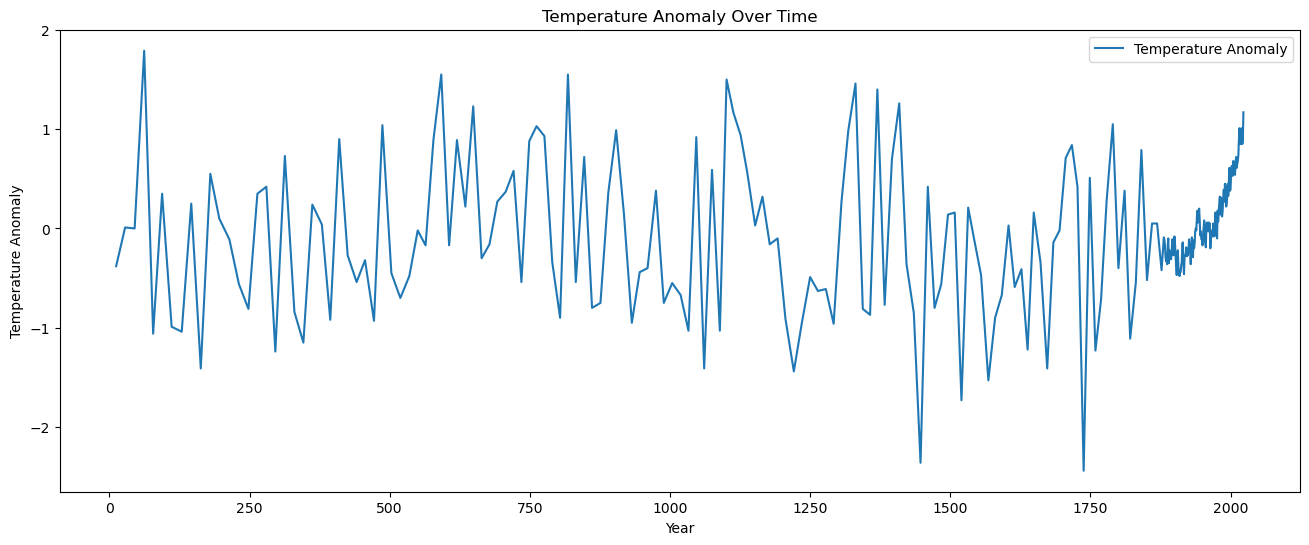

In [343]:
plt.figure(figsize=(16, 6))

plt.plot(temp_anom_plt['Year'], temp_anom_plt['merged_temp'], label='Temperature Anomaly')
plt.title('Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()

The line for temperature anomalies looks smoother in recent years, it might be because we have more data points for that time period (also visible in frequency plot for Year). Having more data points allows us to capture finer details and trends, making the overall pattern appear smoother when we plot it. 

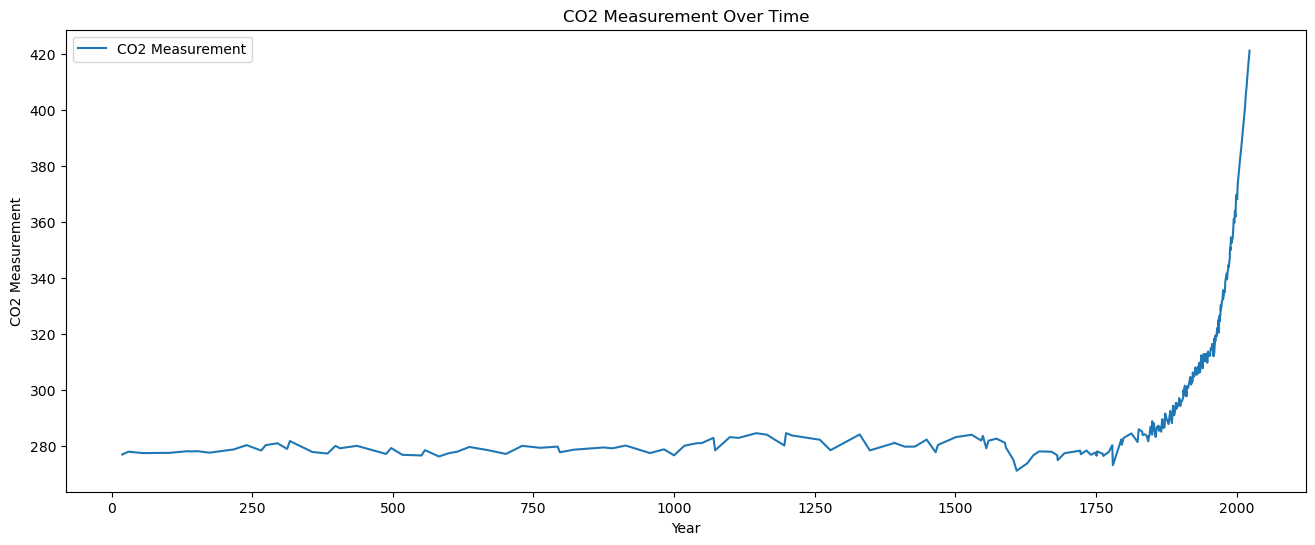

In [344]:
plt.figure(figsize=(16, 6))
plt.plot(co2_df_plt['Year'], co2_df_plt['co2'], label='CO2 Measurement')
plt.title('CO2 Measurement Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Measurement')
plt.legend()
plt.show()

the CO2 line shows a significant and steep increase in recent centuries, suggesting a notable rise in CO2 concentrations during this period. These observations could be indicative of evolving climate conditions, with temperature trends showing more stability while CO2 levels experience a pronounced upward trend.

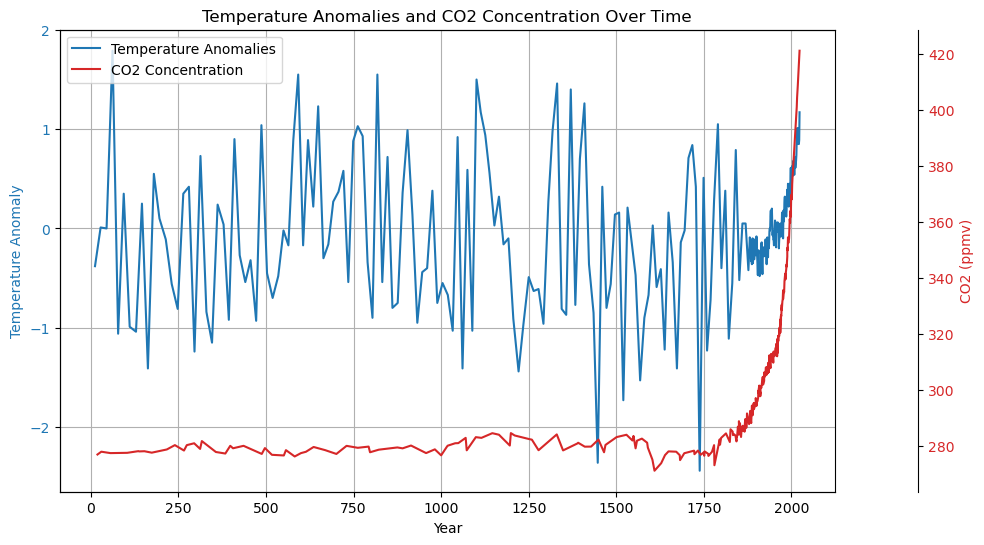

In [345]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(temp_anom_plt['Year'], temp_anom_plt['merged_temp'], label='Temperature Anomalies', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(co2_df_plt['Year'], co2_df_plt['co2'], label='CO2 Concentration', linestyle='-', color='tab:red')
ax2.set_ylabel('CO2 (ppmv)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title
plt.title('Temperature Anomalies and CO2 Concentration Over Time')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()


both the blue line (representing temperature anomalies) and the red line (representing CO2 concentration) start to go up around the same time. This suggests that there might be a connection between the increase in temperature anomalies and the rise in CO2 levels during that period. Next is correlation analysis

Correlation heatmap can be found below after fused_dataset. I wanted to unite similar parts in one place. 

Before going to next phases of analysis I wanted to check If timeseries is stationary

Many statistical tests and assumptions in time series analysis, such as autoregressive models, assume stationarity. If the data is non-stationary, these assumptions may be violated, leading to unreliable results.


Augmented Dickey–Fuller test [[14](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)]
[[15](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)]

In [346]:
from statsmodels.tsa.stattools import adfuller

result_temp_anom = adfuller(temp_anom['temp'])
print('ADF Statistic for Temperature Anomaly:', result_temp_anom[0])
print('p-value:', result_temp_anom[1])

result_co2 = adfuller(co2_df['co2'])
print('ADF Statistic for CO2:', result_co2[0])
print('p-value:', result_co2[1])

ADF Statistic for Temperature Anomaly: -4.912727997979897
p-value: 3.293855623077973e-05
ADF Statistic for CO2: -8.795597072939104
p-value: 2.1808422769484863e-14


The results of the Augmented Dickey-Fuller (ADF) tests for both the Temperature Anomaly and CO2 Measurement time series indicate low p-values. Typically, a p-value less than a chosen significance level (commonly 0.05) leads to rejecting the null hypothesis of non-stationarity.


Temperature Anomaly:

ADF Statistic: -4.9127
p-value: 3.2939e-05
CO2 Measurement:

ADF Statistic: -8.7956
p-value: 2.1808e-14
In both cases, the p-values are significantly lower than 0.05, suggesting that we can reject the null hypothesis of non-stationarity. This implies that the time series for Temperature Anomaly and CO2 Measurement are likely stationary.



### linear regression

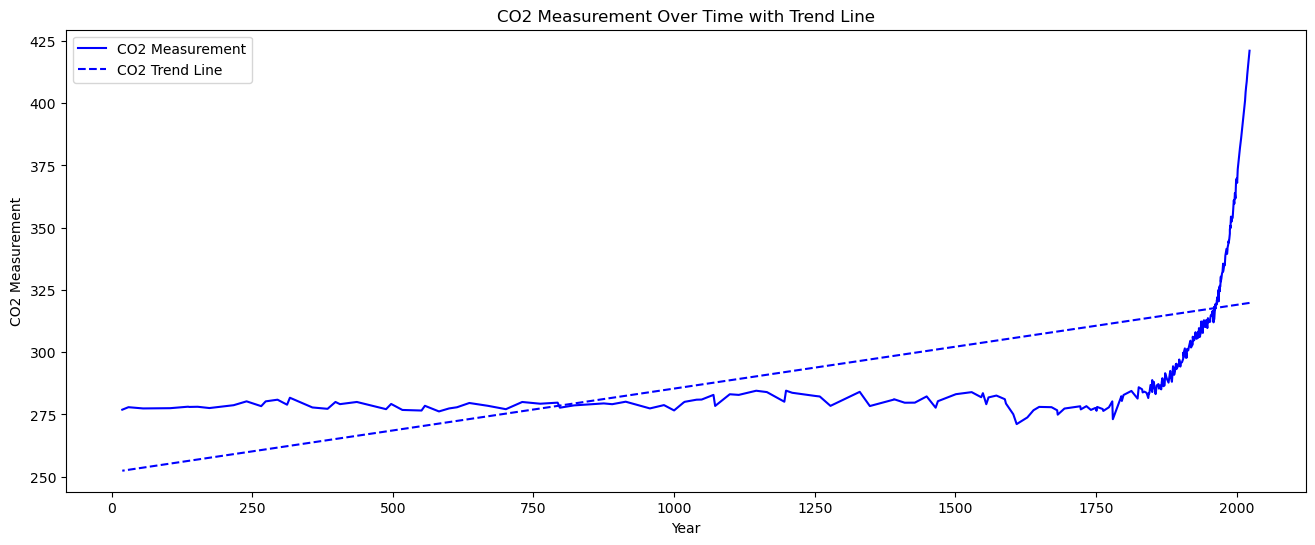

In [347]:

# Fit linear regression for CO2 Measurement
co2_model = LinearRegression()
co2_model.fit(co2_df_plt[['Year']], co2_df_plt['co2'])
co2_trend = co2_model.predict(co2_df_plt[['Year']])

# Plotting CO2 Measurement with Trend Line
plt.figure(figsize=(16, 6))
plt.plot(co2_df_plt['Year'], co2_df_plt['co2'], label='CO2 Measurement', color='blue')
plt.plot(co2_df_plt['Year'], co2_trend, label='CO2 Trend Line', linestyle='--', color='blue')
plt.title('CO2 Measurement Over Time with Trend Line')
plt.xlabel('Year')
plt.ylabel('CO2 Measurement')
plt.legend()
plt.show()

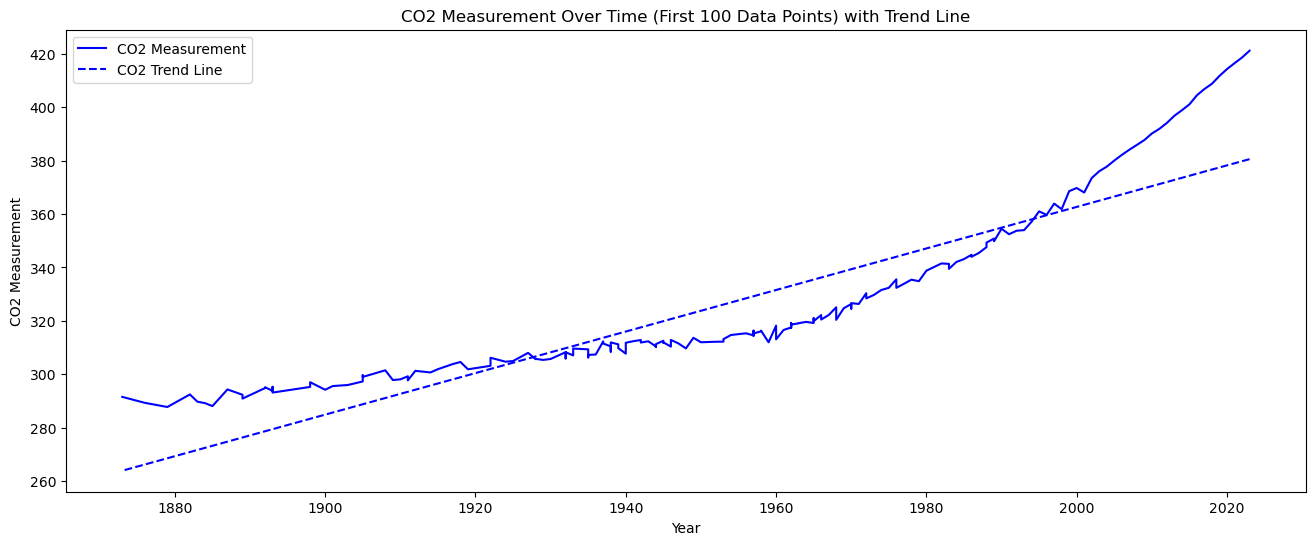

In [348]:
# Selecting the first 100 data points
co2_df_plt_subset = co2_df_plt.head(175)


# Fit linear regression for CO2 Measurement
co2_model = LinearRegression()
co2_model.fit(co2_df_plt_subset[['Year']], co2_df_plt_subset['co2'])
co2_trend = co2_model.predict(co2_df_plt_subset[['Year']])

# Plotting CO2 Measurement with Trend Line
plt.figure(figsize=(16, 6))
plt.plot(co2_df_plt_subset['Year'], co2_df_plt_subset['co2'], label='CO2 Measurement', color='blue')
plt.plot(co2_df_plt_subset['Year'], co2_trend, label='CO2 Trend Line', linestyle='--', color='blue')
plt.title('CO2 Measurement Over Time (First 100 Data Points) with Trend Line')
plt.xlabel('Year')
plt.ylabel('CO2 Measurement')
plt.legend()
plt.show()

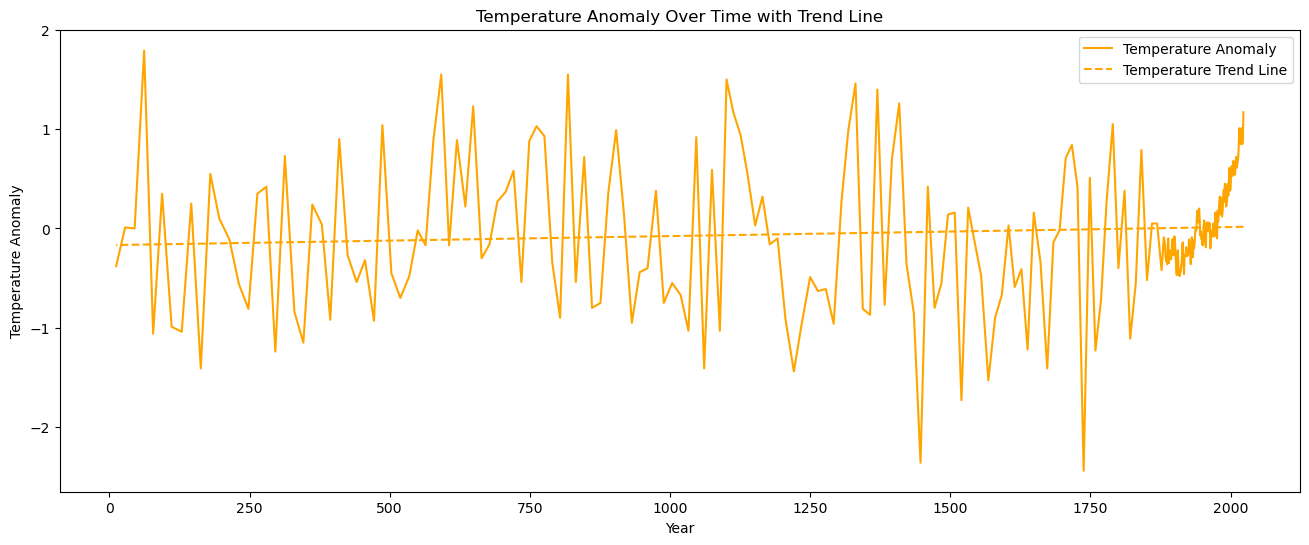

In [349]:
# Fit linear regression for Temperature Anomaly
temp_model = LinearRegression()
temp_model.fit(temp_anom_plt[['Year']], temp_anom_plt['merged_temp'])
temp_trend = temp_model.predict(temp_anom_plt[['Year']])

# Plotting Temperature Anomaly with Trend Line
plt.figure(figsize=(16, 6))
plt.plot(temp_anom_plt['Year'], temp_anom_plt['merged_temp'], label='Temperature Anomaly', color='orange')
plt.plot(temp_anom_plt['Year'], temp_trend, label='Temperature Trend Line', linestyle='--', color='orange')
plt.title('Temperature Anomaly Over Time with Trend Line')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()

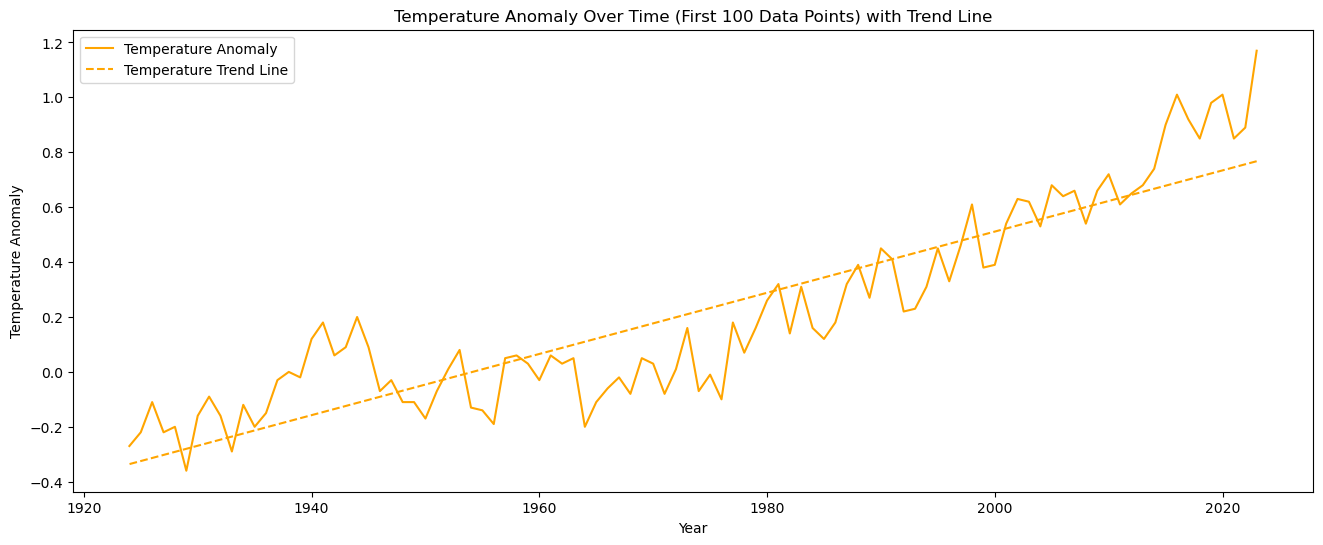

Temperature Anomaly Linear Regression Coefficients:
Slope: 0.011145154515451549
Intercept: -21.77916243624363



In [420]:
# Selecting the first 100 data points
temp_anom_plt_subset = temp_anom_plt.head(100)

# Fit linear regression for Temperature Anomaly
temp_model = LinearRegression()
temp_model.fit(temp_anom_plt_subset[['Year']], temp_anom_plt_subset['merged_temp'])
temp_trend = temp_model.predict(temp_anom_plt_subset[['Year']])

# Plotting Temperature Anomaly with Trend Line
plt.figure(figsize=(16, 6))
plt.plot(temp_anom_plt_subset['Year'], temp_anom_plt_subset['merged_temp'], label='Temperature Anomaly', color='orange')
plt.plot(temp_anom_plt_subset['Year'], temp_trend, label='Temperature Trend Line', linestyle='--', color='orange')
plt.title('Temperature Anomaly Over Time (First 100 Data Points) with Trend Line')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()


# Output Temperature Anomaly Linear Regression Coefficients
print("Temperature Anomaly Linear Regression Coefficients:")
print(f"Slope: {temp_model.coef_[0]}")
print(f"Intercept: {temp_model.intercept_}\n")


The linear regression coefficients for the Temperature Anomaly indicate that, on average, the temperature anomaly increases by approximately 0.0111 units per year. The negative intercept suggests that the initial temperature anomaly, when the year is zero, is estimated to be around -21.78 
But I see that trendline do not catch recent huge change, so it isn't linear now

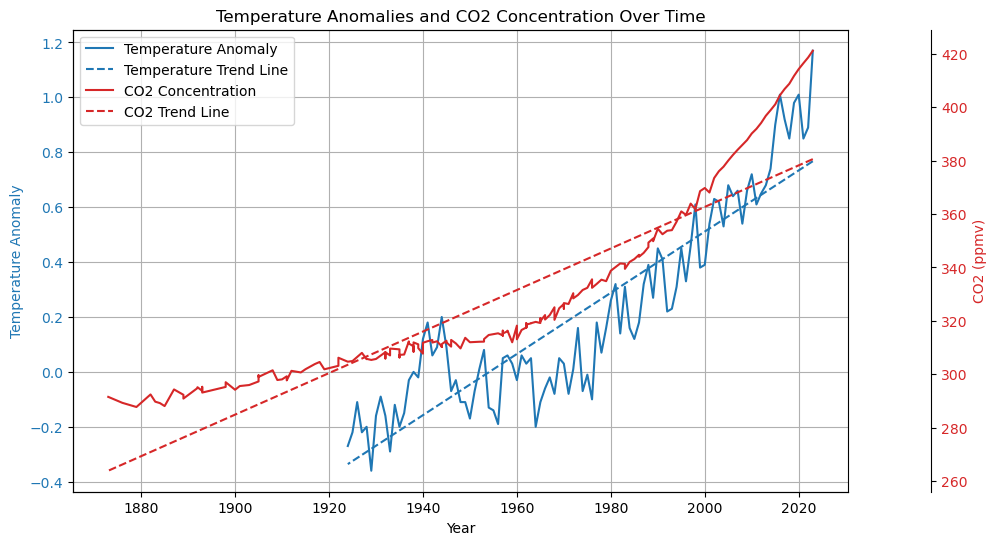

In [351]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(temp_anom_plt_subset['Year'], temp_anom_plt_subset['merged_temp'], label='Temperature Anomaly', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
#plt.plot(temp_anom_plt_subset['Year'], temp_anom_plt_subset['merged_temp'], label='Temperature Anomaly', color='orange')
plt.plot(temp_anom_plt_subset['Year'], temp_trend, label='Temperature Trend Line', linestyle='--', color='tab:blue')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(co2_df_plt_subset['Year'], co2_df_plt_subset['co2'], label='CO2 Concentration', linestyle='-', color='tab:red')
ax2.plot(co2_df_plt_subset['Year'], co2_trend, label='CO2 Trend Line', linestyle='--', color='tab:red')



ax2.set_ylabel('CO2 (ppmv)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title
plt.title('Temperature Anomalies and CO2 Concentration Over Time')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

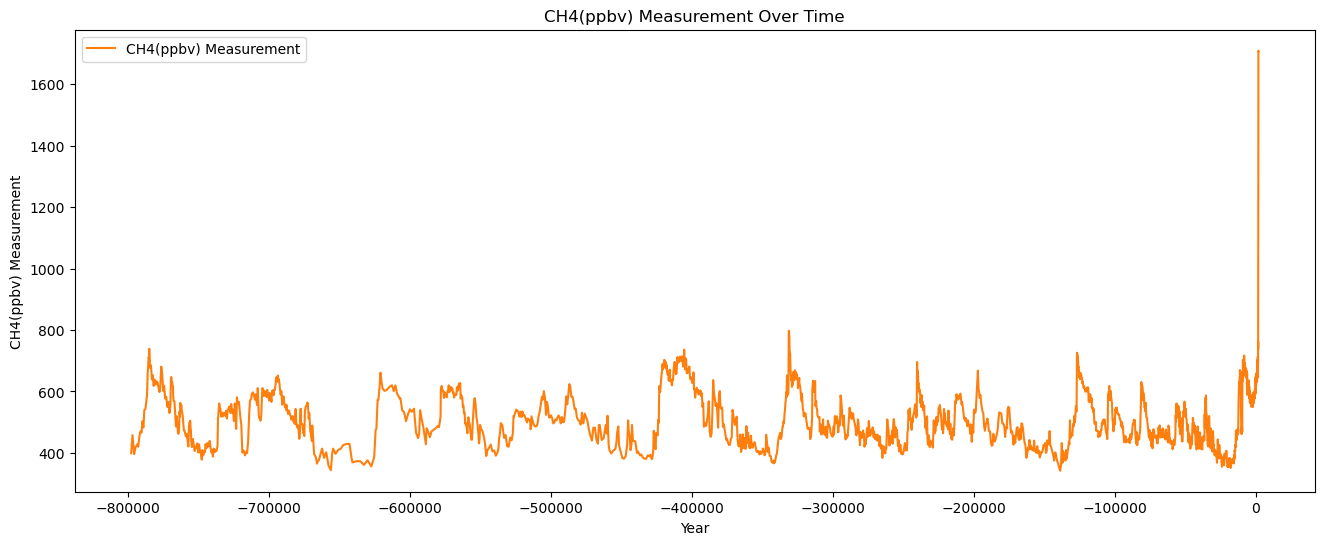

In [369]:
plt.figure(figsize=(16, 6))
plt.plot(methan_merged['Year'], methan_merged['methan_merged'], label='CH4(ppbv) Measurement', color='tab:orange')
plt.title('CH4(ppbv) Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CH4(ppbv) Measurement')
plt.legend()
plt.show()

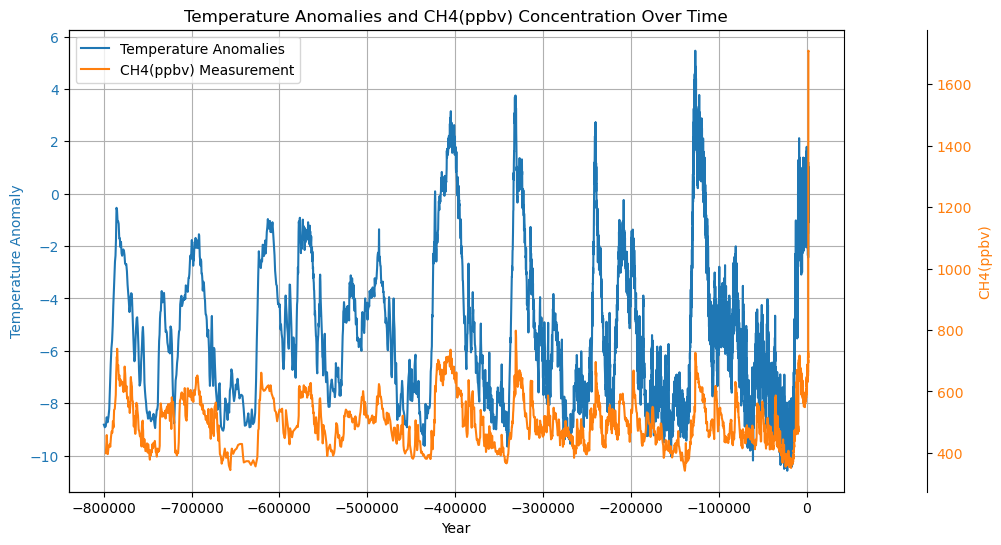

In [371]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(temp_anom_merged['Year'], temp_anom_merged['merged_temp'], label='Temperature Anomalies', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(methan_merged['Year'], methan_merged['methan_merged'], label='CH4(ppbv) Measurement', linestyle='-', color='tab:orange')
ax2.set_ylabel('CH4(ppbv)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set title
plt.title('Temperature Anomalies and CH4(ppbv) Concentration Over Time')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

## Fused dataset CO2, CH4, temperature anomalies




In [354]:
fused_data = temp_anom_merged_2023.merge(co2_df_merged_2023, on='Year', how='outer')
fused_data = fused_data.merge(methan_merged, on='Year', how='outer')
fused_data = fused_data.sort_values('Year', ascending=False) 
fused_data = fused_data.reset_index(drop=True)


fused_data = fused_data[['Year', 'merged_temp_new', 'merged_co2_new', 'methan_merged' ]].copy()
fused_data=fused_data.rename(columns={'merged_temp_new': 'temparature_anomaly_celsium', 'merged_co2_new':'CO2(ppmv)', 'methan_merged':'CH4(ppbv)'})

In [367]:
fused_data.tail(40)

,Year,temparature_anomaly_celsium,CO2(ppmv),CH4(ppbv)
10861,-790877,NaN,NaN,470.0
10862,-790993,NaN,204.000000,NaN
10863,-791129,-5.91,NaN,NaN
10864,-791310,NaN,209.000000,NaN
10865,-791569,NaN,213.357760,NaN
10866,-791646,NaN,NaN,451.0
10867,-791902,NaN,218.392642,NaN
10868,-791926,-6.51,NaN,NaN
10869,-792450,NaN,NaN,420.0
10870,-792658,NaN,199.400000,NaN


 The orient parameter specifies the format of the JSON file. Setting it to 'records' creates a list of dictionaries, and lines=True creates a JSON file with one record per line.




In [360]:
#Create CSV File 

fused_data.to_csv("fused_datasets/fused_dataset.csv", index=False)

#Create a JSON FILE

fused_data.to_json("fused_datasets/fused_dataset.json", orient='records', lines=True)

back to analysis

### 2.2. CO2, CH4, Temperature



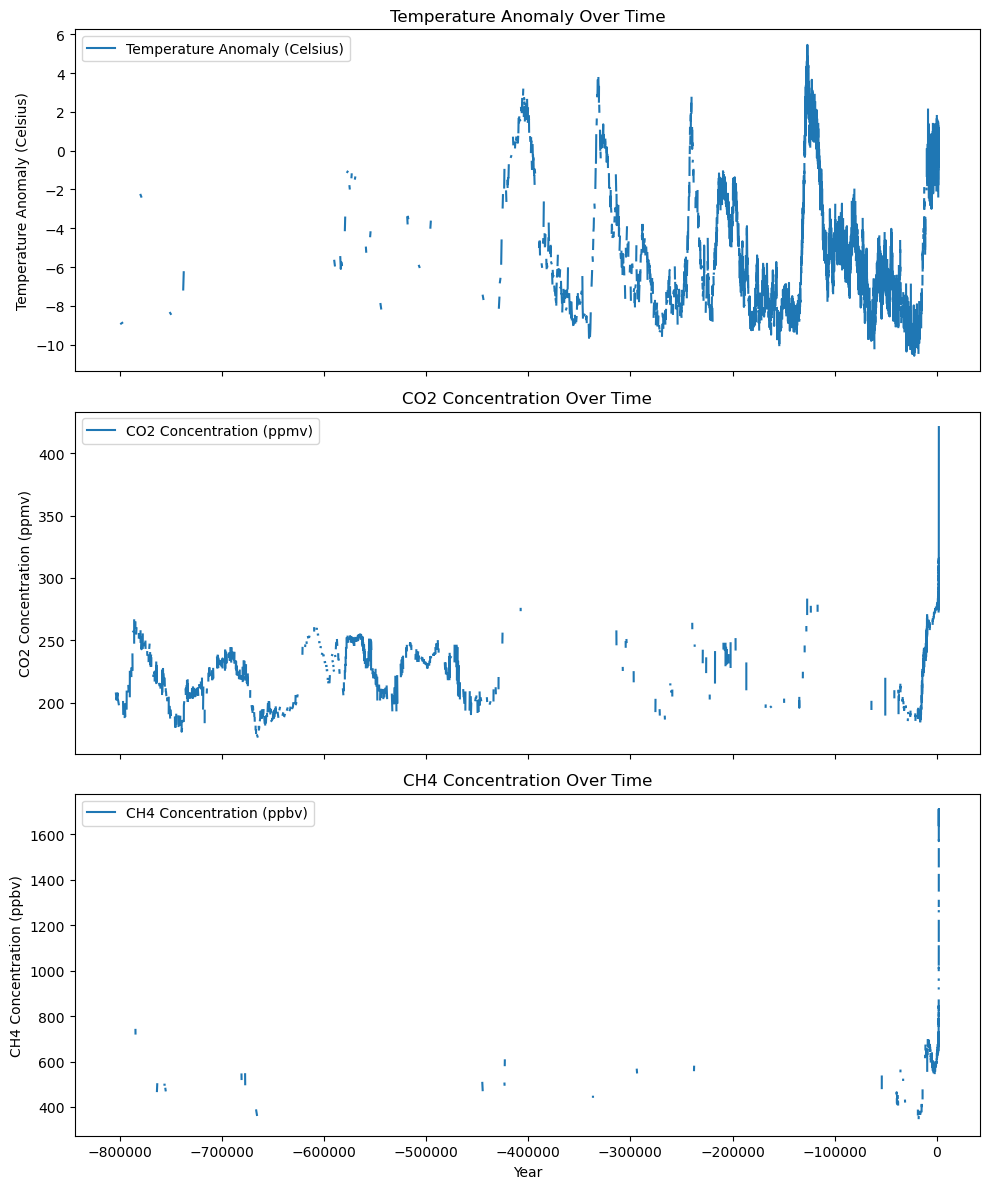

In [368]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plotting the data
ax1.plot(fused_data['Year'], fused_data['temparature_anomaly_celsium'], label='Temperature Anomaly (Celsius)', linestyle='-')
ax2.plot(fused_data['Year'], fused_data['CO2(ppmv)'], label='CO2 Concentration (ppmv)', linestyle='-')
ax3.plot(fused_data['Year'], fused_data['CH4(ppbv)'], label='CH4 Concentration (ppbv)', linestyle='-')

# Adding labels and title
ax3.set_xlabel('Year')

# Adding labels and title to each subplot
ax1.set_ylabel('Temperature Anomaly (Celsius)')
ax1.set_title('Temperature Anomaly Over Time')

ax2.set_ylabel('CO2 Concentration (ppmv)')
ax2.set_title('CO2 Concentration Over Time')

ax3.set_ylabel('CH4 Concentration (ppbv)')
ax3.set_title('CH4 Concentration Over Time')

# Adding legends
ax1.legend()
ax2.legend()
ax3.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Interpolation is used to estimate or fill in missing values in a dataset by predicting them based on the available data points. In the context of time series data, interpolation helps create a more continuous and complete representation of the variable of interest over time. This ensures a smoother visualization and allows for a more comprehensive analysis, especially when dealing with time-dependent trends and patterns. [[16](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)]

In [380]:
fused_data['interp_temparature_anomaly_celsium'] = fused_data['temparature_anomaly_celsium'].interpolate(method='linear', limit=50, limit_direction='forward')
fused_data['interp_CO2(ppmv)'] = fused_data['CO2(ppmv)'].interpolate(method='linear', limit=50, limit_direction='forward')

fused_data['interp_CH4(ppbv)'] = fused_data['CH4(ppbv)'].interpolate(method='linear', limit=50, limit_direction='forward')


In [379]:
fused_data

,Year,temparature_anomaly_celsium,CO2(ppmv),CH4(ppbv),interp_temparature_anomaly_celsium,interp_CO2(ppmv),interp_CH4(ppbv)
0,2023,1.17,421.080000,NaN,1.17,421.080000,1708.071148
1,2022,0.89,418.530000,NaN,0.89,418.530000,1708.071148
2,2021,0.85,416.410000,NaN,0.85,416.410000,1708.071148
3,2020,1.01,414.210000,NaN,1.01,414.210000,1708.071148
4,2019,0.98,411.650000,NaN,0.98,411.650000,1708.071148
...,...,...,...,...,...,...,...
10896,-801975,NaN,202.921723,NaN,-8.82,202.921723,NaN
10897,-802059,NaN,207.498645,NaN,-8.82,207.498645,NaN
10898,-802572,NaN,204.861938,NaN,-8.82,204.861938,NaN
10899,-803182,NaN,202.226839,NaN,-8.82,202.226839,NaN


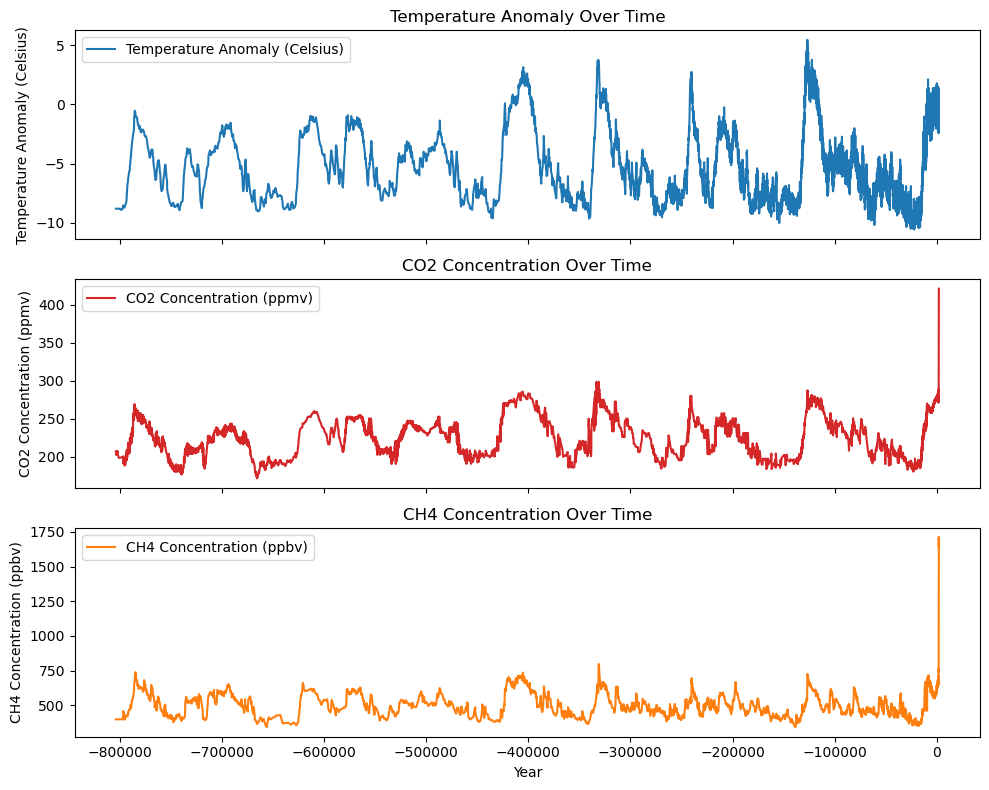

In [387]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plotting the data
ax1.plot(fused_data['Year'], fused_data['interp_temparature_anomaly_celsium'], label='Temperature Anomaly (Celsius)', linestyle='-')
ax2.plot(fused_data['Year'], fused_data['interp_CO2(ppmv)'], label='CO2 Concentration (ppmv)', linestyle='-', color='tab:red')
ax3.plot(fused_data['Year'], fused_data['interp_CH4(ppbv)'], label='CH4 Concentration (ppbv)', linestyle='-', color='tab:orange')

# Adding labels and title
ax3.set_xlabel('Year')

# Adding labels and title to each subplot
ax1.set_ylabel('Temperature Anomaly (Celsius)')
ax1.set_title('Temperature Anomaly Over Time')

ax2.set_ylabel('CO2 Concentration (ppmv)')
ax2.set_title('CO2 Concentration Over Time')

ax3.set_ylabel('CH4 Concentration (ppbv)')
ax3.set_title('CH4 Concentration Over Time')

# Adding legends
ax1.legend()
ax2.legend()
ax3.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

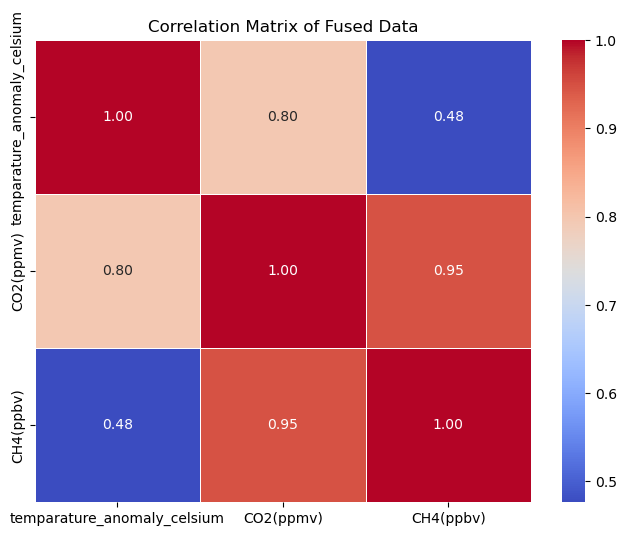

In [391]:
selected_columns = ['temparature_anomaly_celsium', 'CO2(ppmv)', 'CH4(ppbv)']
correlation_matrix = fused_data[selected_columns].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Fused Data')
plt.show()




A correlation coefficient of 0.95 between **CO2 (carbon dioxide) and CH4 (methane)** suggests a strong positive correlation between these two variables.

The high positive correlation indicates that as the concentration of CO2 increases, there is a tendency for the concentration of CH4 to also increase, and vice versa

The correlation may imply that there are common sources or processes influencing the levels of both CO2 and CH4. For example, certain human activities or natural processes could be contributing to the simultaneous increase in both greenhouse gases.

(CH4 and CO2 - "green house gases")


A correlation coefficient of 0.8 between **temperature anomaly and CO2** suggests a strong positive correlation between these two variables.

The positive correlation may indicate a relationship between increasing temperatures and rising levels of CO2. This is consistent with the understanding that CO2 is a greenhouse gas, and higher concentrations contribute to the greenhouse effect, leading to global warming

Changes in temperature may influence processes or feedback mechanisms that affect the concentration of CO2, and vice versa. For example, warmer temperatures can lead to the release of CO2 from natural sources like permafrost or changes in vegetation.

It's important to consider the time lag between changes in temperature and CO2 levels. Changes in temperature may precede changes in CO2 concentration or vice versa, and the correlation may reflect this temporal relationship.


A correlation coefficient of 0.48 between **temperature anomaly and CH4 (methane)** suggests a positive but moderate correlation between these two variables. 

Methane can be emitted from both natural sources (e.g., wetlands, permafrost) and human activities (e.g., livestock, fossil fuel extraction). The correlation might reflect the combined influence of natural and anthropogenic sources.

Changes in temperature may influence processes or feedback mechanisms that affect methane emissions, and vice versa. For example, warmer temperatures can impact the release of methane from permafrost.

All of this require further analysis


### Lag analysis

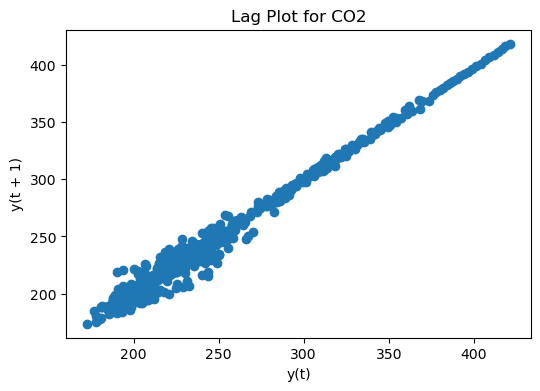

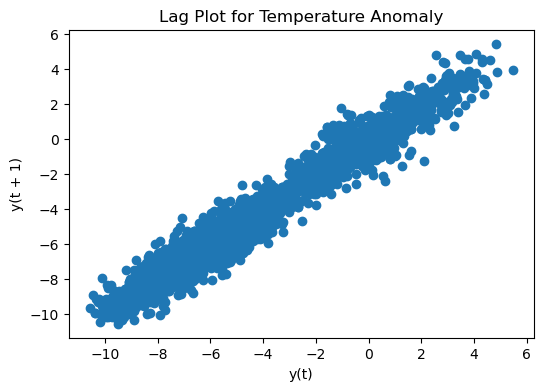

In [396]:
from pandas.plotting import lag_plot

# Lag plot for CO2
plt.figure(figsize=(6, 4))
lag_plot(fused_data['CO2(ppmv)'])
plt.title('Lag Plot for CO2')
plt.show()

# Lag plot for temperature anomaly
plt.figure(figsize=(6, 4))
lag_plot(fused_data['temparature_anomaly_celsium'])
plt.title('Lag Plot for Temperature Anomaly')
plt.show()

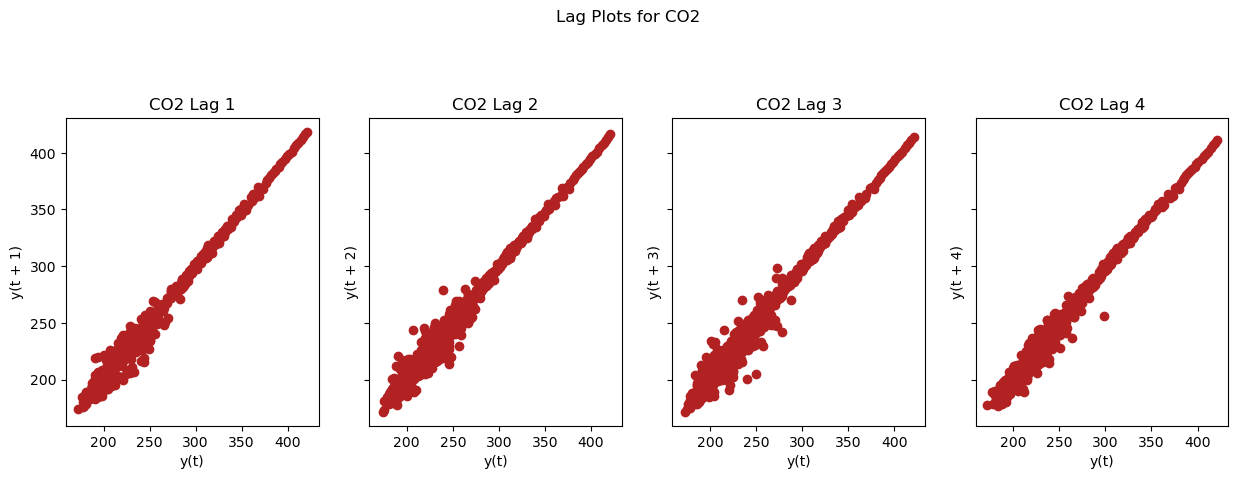

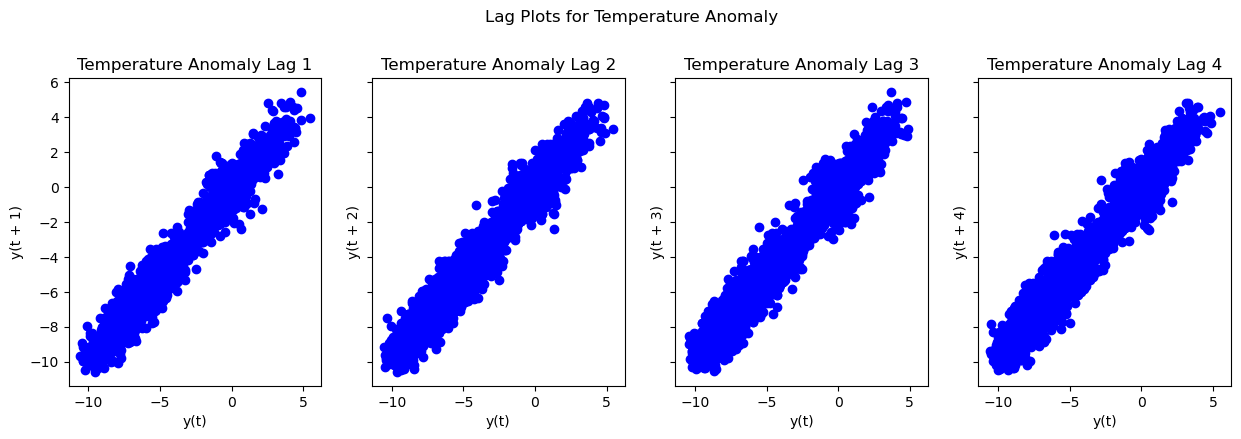

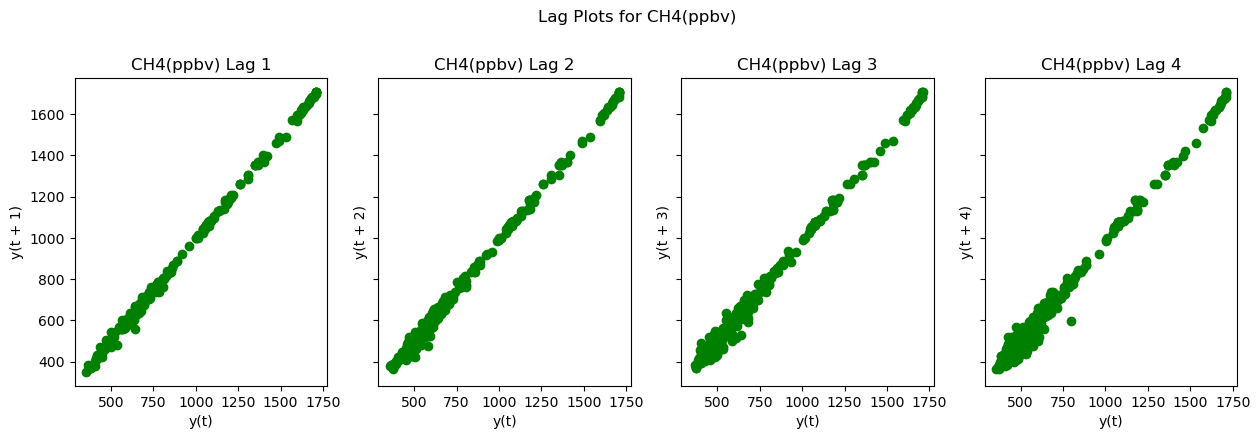

In [402]:
# code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True, dpi=100)

# Plot lag plots for CO2
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(fused_data['CO2(ppmv)'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title(f'CO2 Lag {i+1}')

fig.suptitle('Lag Plots for CO2', y=1.15)

# Set up subplots for temperature anomaly
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True, dpi=100)

# Plot lag plots for temperature anomaly
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(fused_data['temparature_anomaly_celsium'], lag=i+1, ax=ax, c='blue')
    ax.set_title(f'Temperature Anomaly Lag {i+1}')

fig.suptitle('Lag Plots for Temperature Anomaly', y=1.05)

# Set up subplots for temperature anomaly
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True, dpi=100)
# Plot lag plots for temperature anomaly
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(fused_data['CH4(ppbv)'], lag=i+1, ax=ax, c='green')
    ax.set_title(f'CH4(ppbv) Lag {i+1}')

fig.suptitle('Lag Plots for CH4(ppbv)', y=1.05)

plt.show()

all the dots fall along the main diagonal line, it suggests a high degree of autocorrelation and a strong linear relationship between the variable and its lagged values. This pattern indicates that there is a consistent and predictable relationship between the variable's current value and its past values

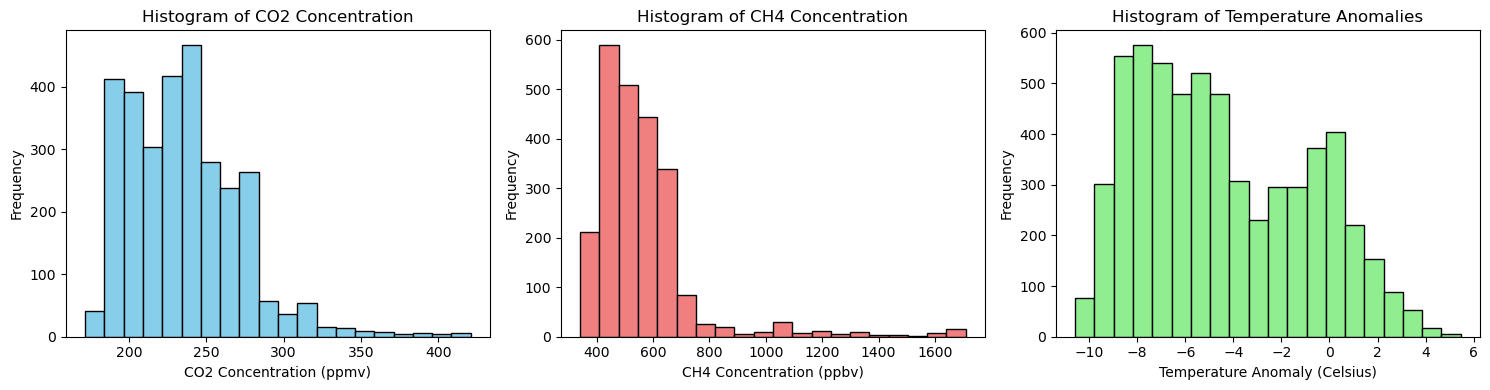

In [399]:
# Create a subplot for 'CO2(ppmv)'
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(fused_data['CO2(ppmv)'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CO2 Concentration')
plt.xlabel('CO2 Concentration (ppmv)')
plt.ylabel('Frequency')

# Create a subplot for 'CH4(ppbv)'
plt.subplot(1, 3, 2)
plt.hist(fused_data['CH4(ppbv)'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of CH4 Concentration')
plt.xlabel('CH4 Concentration (ppbv)')
plt.ylabel('Frequency')

# Create a subplot for 'temparature_anomaly_celsium'
plt.subplot(1, 3, 3)
plt.hist(fused_data['temparature_anomaly_celsium'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Temperature Anomalies')
plt.xlabel('Temperature Anomaly (Celsius)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

CO2 levels over history was almost in 200-250 range. I want to see frequency plots 800kyr-present in comparison to recent 100 years.

In [408]:
#methan_merged_subplot is dataframe for ch4 for last 100years
# for temperature anomalies and co2 were created before performing liniar regression

methan_merged_subplot = methan_merged.iloc[:100]

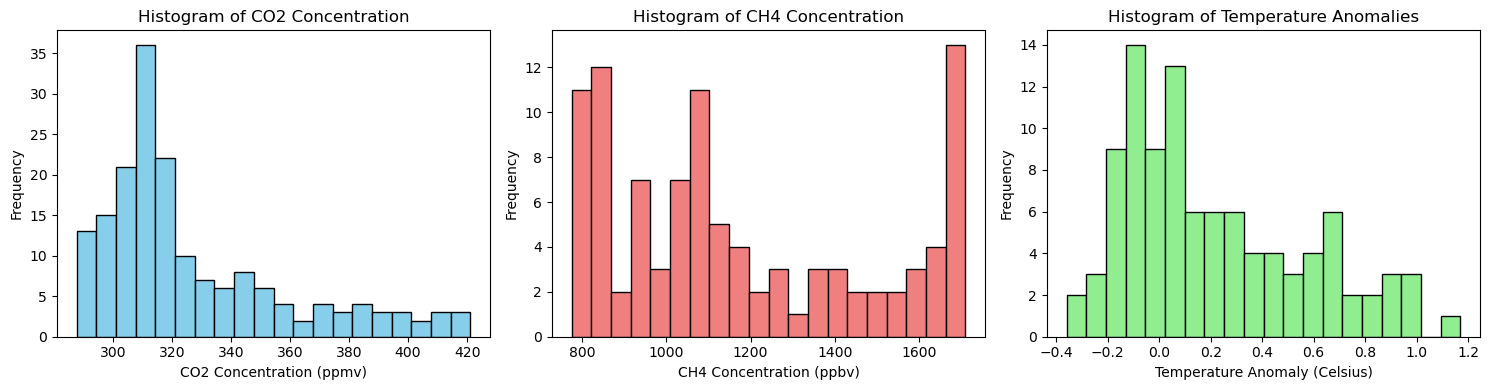

In [409]:
temp_anom_plt_subset['Year'], temp_anom_plt_subset['merged_temp']
co2_df_plt_subset['Year'], co2_df_plt_subset['co2']

# Create a subplot for 'CO2(ppmv)'
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(co2_df_plt_subset['co2'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CO2 Concentration')
plt.xlabel('CO2 Concentration (ppmv)')
plt.ylabel('Frequency')

# Create a subplot for 'CH4(ppbv)'
plt.subplot(1, 3, 2)
plt.hist(methan_merged_subplot['methan_merged'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of CH4 Concentration')
plt.xlabel('CH4 Concentration (ppbv)')
plt.ylabel('Frequency')

# Create a subplot for 'temparature_anomaly_celsium'
plt.subplot(1, 3, 3)
plt.hist(temp_anom_plt_subset['merged_temp'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Temperature Anomalies')
plt.xlabel('Temperature Anomaly (Celsius)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Summary: 

Gathered datasets for CO2, CH4, temperature anomalies data for 800kyr-present. Cleaning, filling missing data, merging, creating new fused datasets. 
Plots show results of my work

Correlation analysis

Linear regression modeling

Time series analysis: lag analysis
    




### References
___________

[1]Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949

[2]Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.


[3]Mauna Loa Observatory mean co2 https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt

[4] Kyr abbreviations https://www.sedgeochem.uni-bremen.de/kiloyears.html

[5] https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff. 2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, 317(5839), 793-797. doi: 10.1126/science.1141038 https://www.ncei.noaa.gov/access/paleo-search/study/6080

[7] Link to dataset https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

[8] GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/. 

[9] https://www.methanelevels.org/

[10] https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-6093


[11] MacFarling Meure, C.; Etheridge, D.M.; Trudinger, C.; Steele, L.P.; Langenfelds, R.L.; van Ommen, T.D.; Smith, A.M.; Elkins, J. (2010-07-16): NOAA/WDS Paleoclimatology - Law Dome Ice Core 2000-Year CO2, CH4, and N2O Data. NOAA National Centers for Environmental Information. https://doi.org/10.25921/g6kd-k189. Accessed [17.01.2024].

[12]

[13] https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

[14]Augmented Dickey–Fuller test (https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

[15](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

[16] https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea